In [96]:
# Load libraries
import datetime as dt

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn import preprocessing

In [97]:
names = ['class',
         'x-box',
         'y-box',
         'width',
         'high',
         'onpix',
         'x-bar',
         'y-bar',
         'x2bar',
         'y2bar',
         'xybar',
         'x2ybr',
         'xy2br',
         'x-ege',
         'xegvy',
         'y-ege',
         'yegvx']
dataset = pd.read_csv('/Users/balu/dev/GATech/GATECH-7641/assignment1/data/letter-recognition.data', names=names)

# Return the dimensionality of the DataFrame
# print(dataset.shape)

# Generates descriptive statistics
# print(dataset.describe())

# class distribution
# print(dataset.groupby('class').size())

# histograms
# dataset.hist()
# plt.show()

array = dataset.values

X = array[:, 1:17]
Y = array[:, 0]
le = preprocessing.LabelEncoder()
Y = le.fit_transform(Y)
n_digits = len(Y)

In [98]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [99]:
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(data, estimator[-1].labels_,
                                 metric="euclidean", sample_size=300,)
    ]

    # Show the results
    formatter_result = ("{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}"
                        "\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}")
    print(formatter_result.format(*results))

In [100]:
n_digits = len(set(Y))

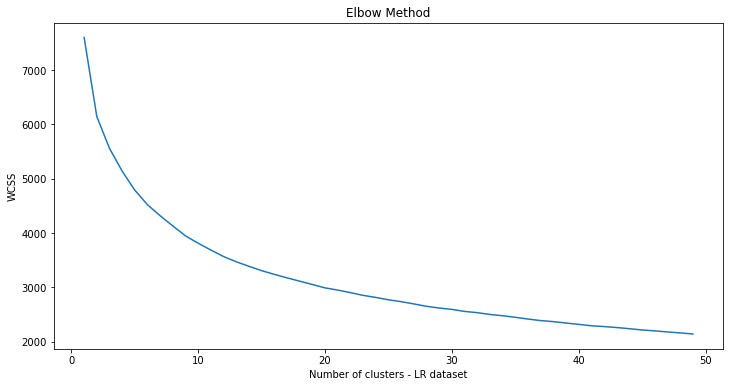

In [75]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 50):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 50), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters - LR dataset')
plt.ylabel('WCSS')
plt.show()

In [101]:
n_digits = 16

In [102]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import GaussianRandomProjection

print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4,
                random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=X, labels=Y)

kmeans = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=X, labels=Y)

pca = PCA(n_components=n_digits).fit(X)
kmeans = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=X, labels=Y)

FastICA = FastICA(n_components=n_digits).fit(X)
kmeans = KMeans(init=FastICA.components_, n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeans, name="ICA-based", data=X, labels=Y)

GaussianRandomProjection = GaussianRandomProjection(n_components=n_digits).fit(X)
kmeans = KMeans(init=GaussianRandomProjection.components_, n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeans, name="RandProj-based", data=X, labels=Y)

#TruncatedSVD = TruncatedSVD(n_components=n_digits).fit(X)
#kmeans = KMeans(init=TruncatedSVD.components_, n_clusters=n_digits, n_init=1)
#bench_k_means(kmeans=kmeans, name="TSVD-based", data=X, labels=Y)

print(82 * '_')

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.503s	142905	0.289	0.350	0.317	0.125	0.315	0.118
random   	0.386s	143460	0.286	0.347	0.314	0.117	0.311	0.140
PCA-based	0.092s	143323	0.280	0.338	0.306	0.122	0.304	0.111
ICA-based	0.128s	145142	0.287	0.353	0.317	0.123	0.315	0.127
RandProj-based	0.077s	143698	0.281	0.345	0.310	0.107	0.308	0.140
__________________________________________________________________________________


In [ ]:
import matplotlib.pyplot as plt

reduced_data = PCA(n_components=2).fit_transform(X)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data.astype('double'))

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
#sklearn kmeans with different distance metrics

In [17]:
#FINDING Centroids using another method silhouette

In [90]:
print(Y)

[19  8  3 ... 19 18  0]


In [103]:
y=Y

X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]
For n_clusters = 10 The average silhouette_score is : 0.140817470788485
For n_clusters = 11 The average silhouette_score is : 0.1436279661310798
For n_clusters = 12 The average silhouette_score is : 0.15159892675031592
For n_clusters = 13 The average silhouette_score is : 0.15112467602122015
For n_clusters = 14 The average silhouette_score is : 0.1520505753065246
For n_clusters = 15 The average silhouette_score is : 0.14700065472825707
For n_clusters = 16 The average silhouette_score is : 0.14242260368474985
For n_clusters = 17 The average silhouette_score is : 0.1423446963064978
For n_clusters = 18 The average silhouette_score is : 0.1427306208079244
For n_clusters = 19 The average silhouette_score is : 0.13927785573583545
For n_clusters = 20 The average silhouette_score is : 0.14268404145321884
For n_clusters = 21 The average silhouette_score is : 0.14753643421091928


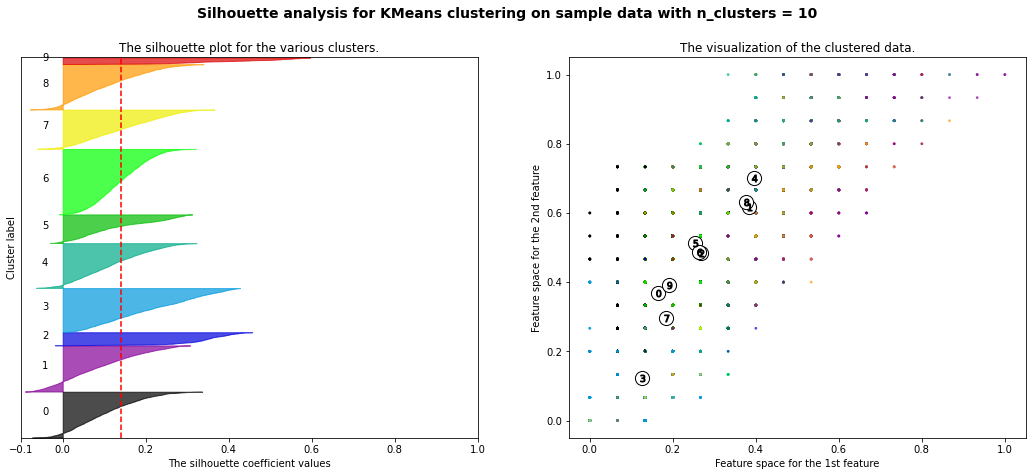

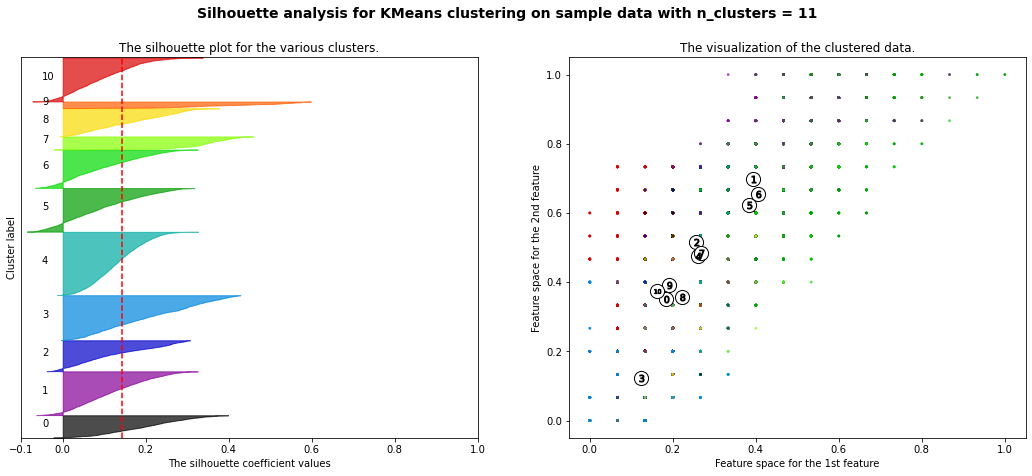

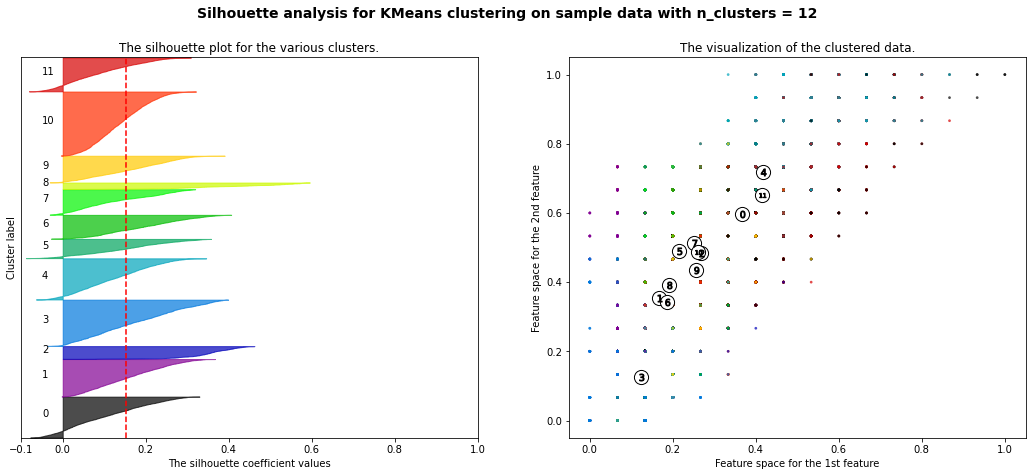

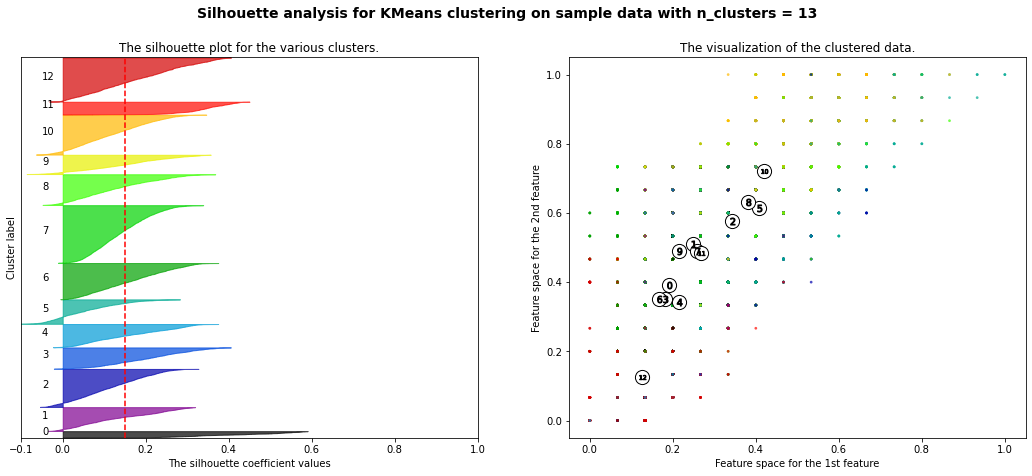

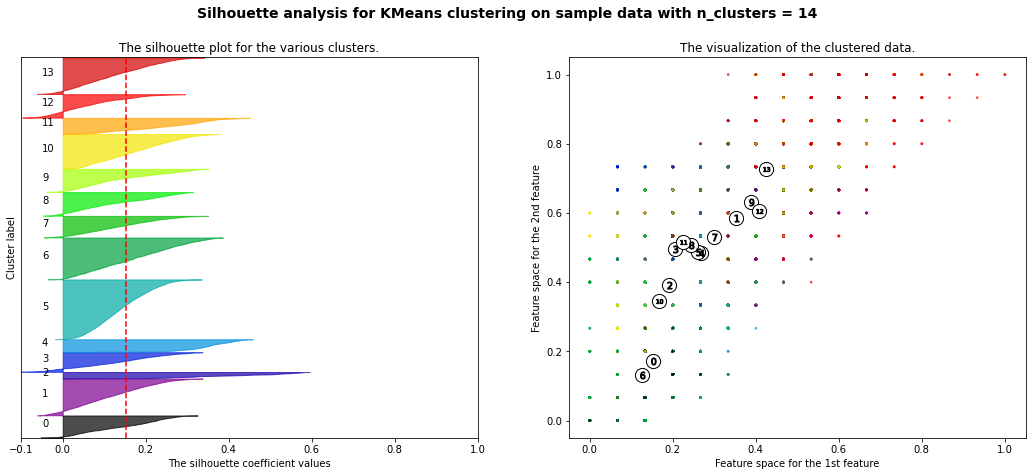

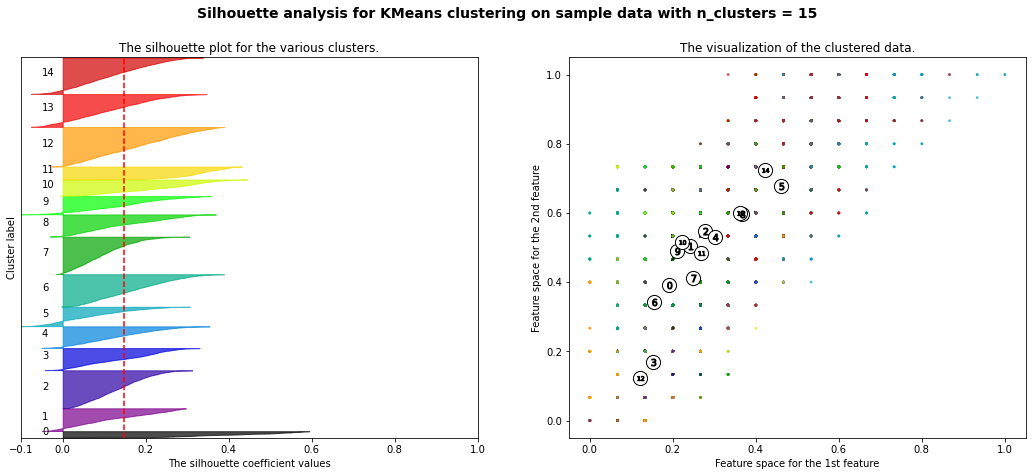

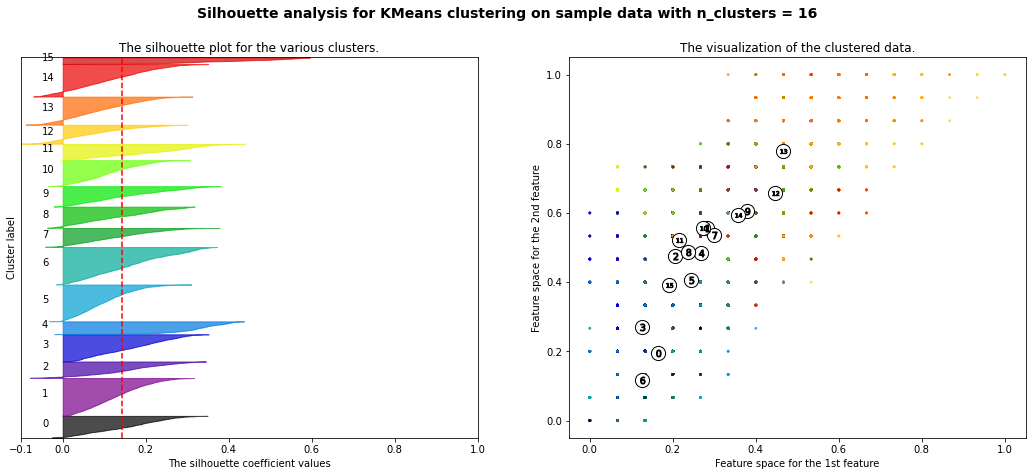

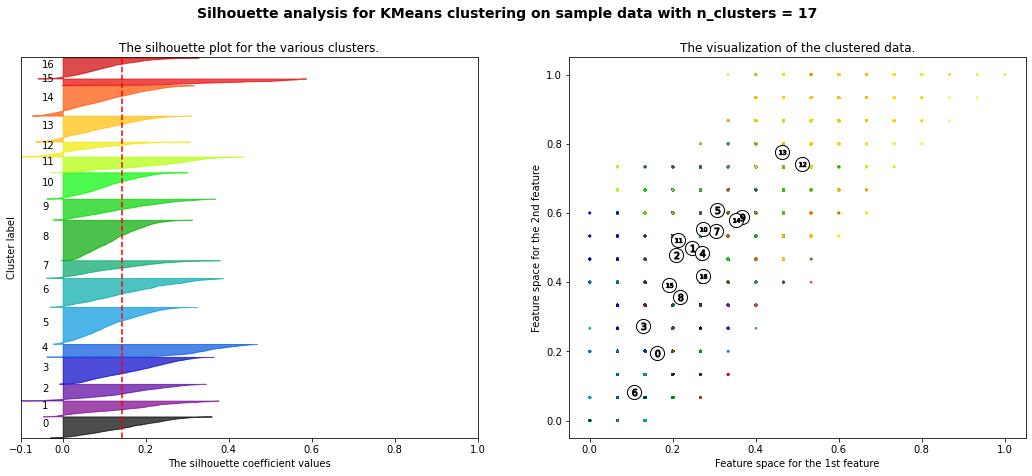

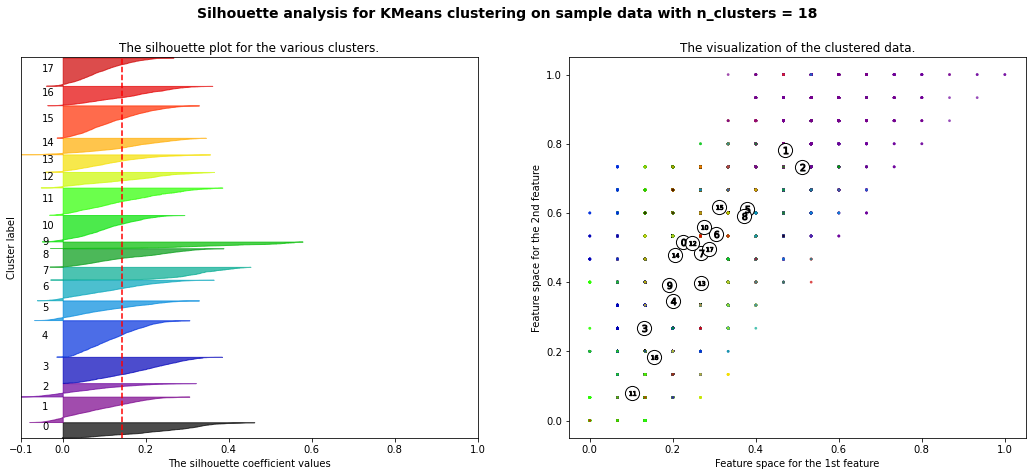

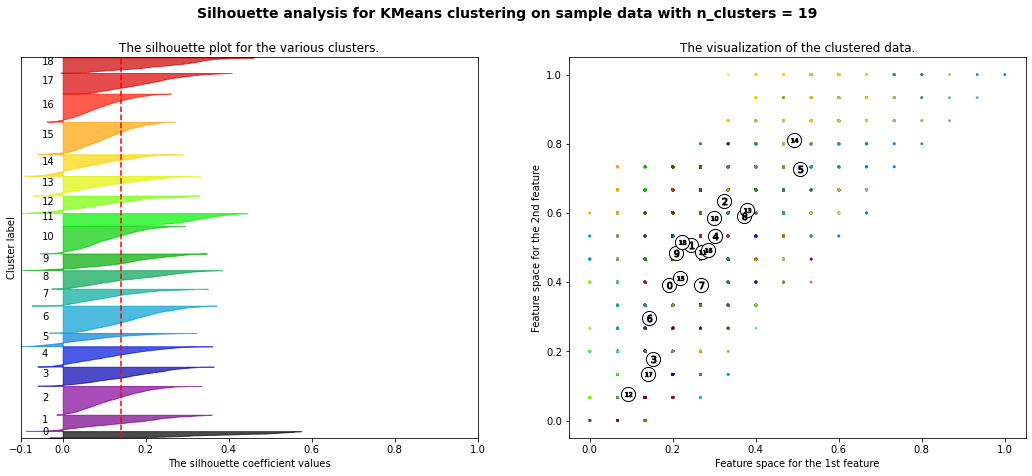

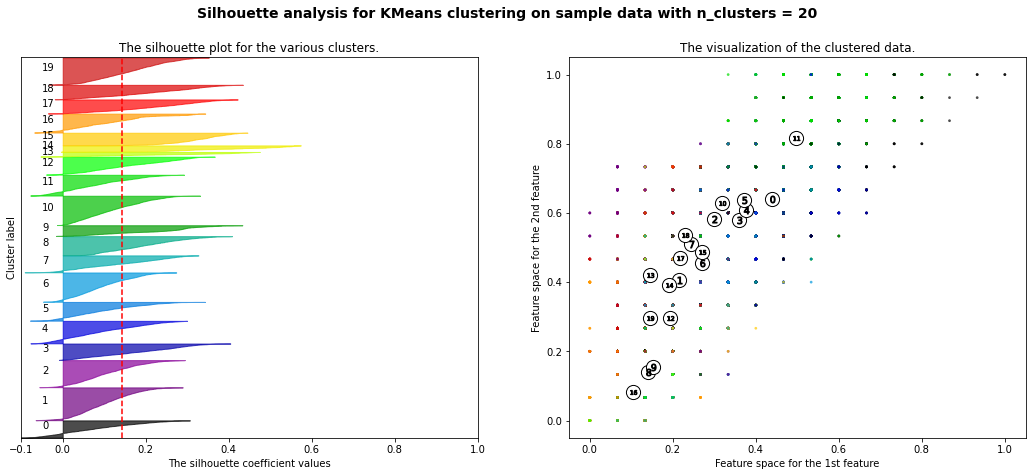

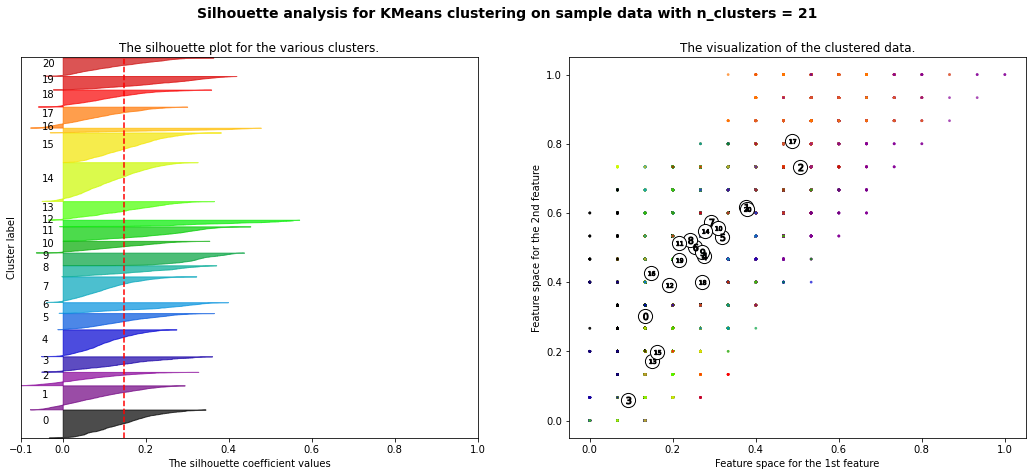

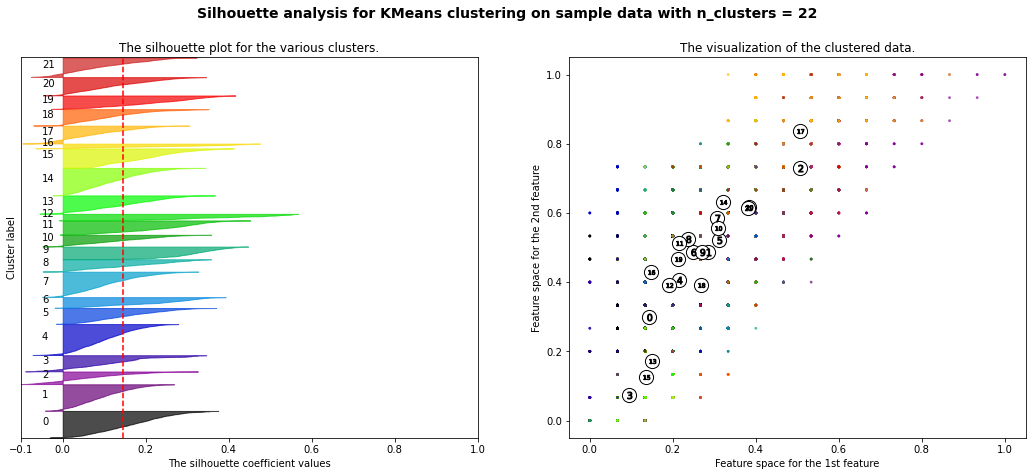

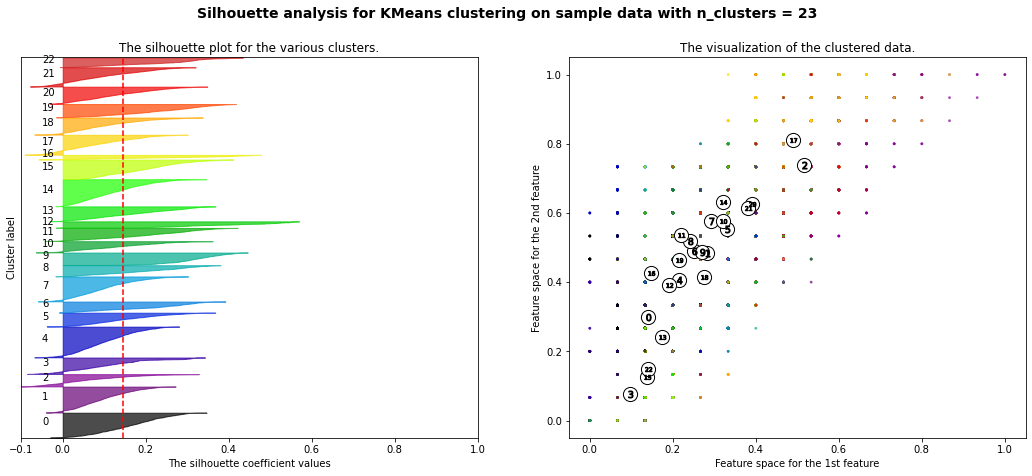

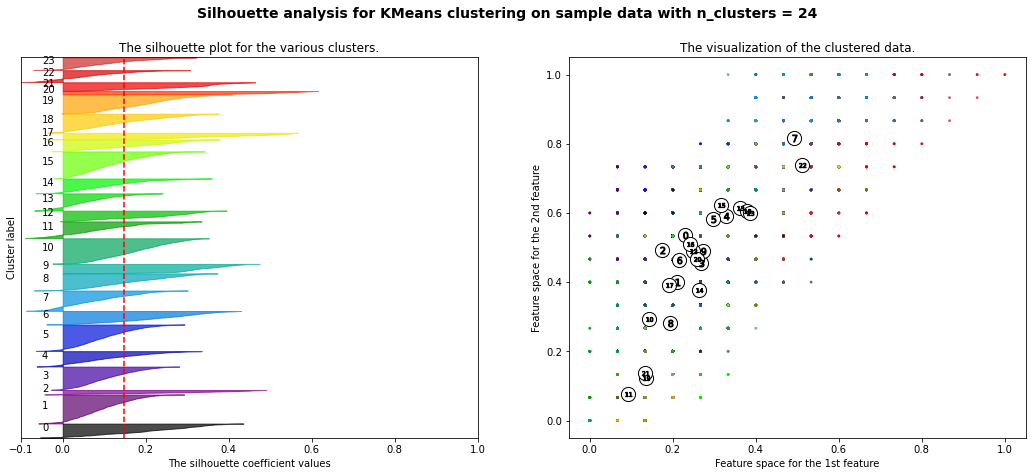

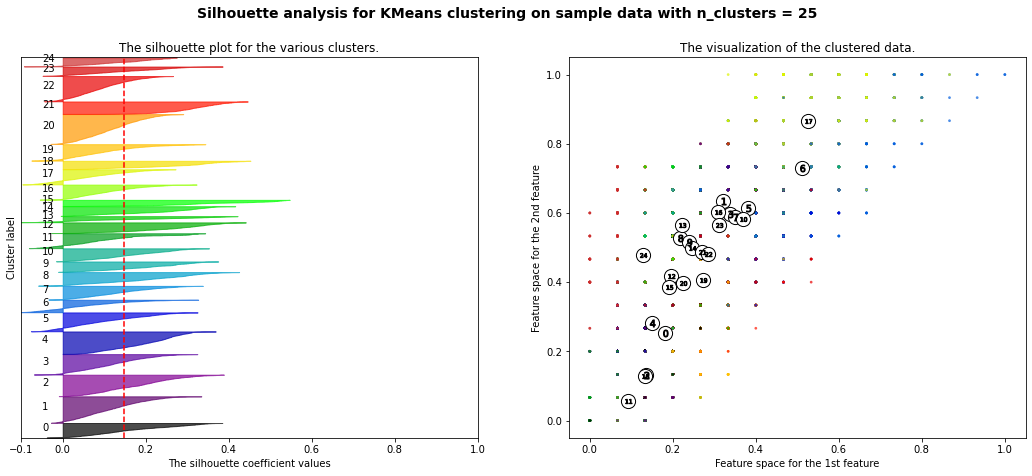

In [92]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
"""X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility"""

range_n_clusters = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [16]:
#clustering implementation using EM algorithm

X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]


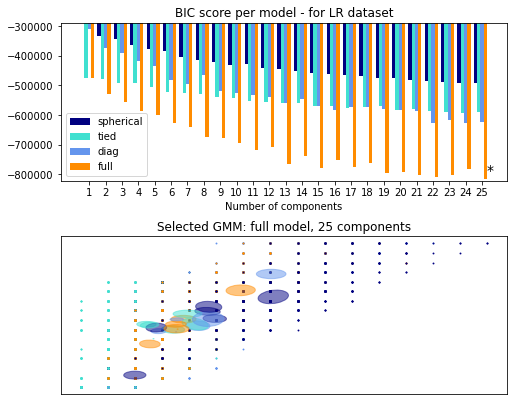

In [76]:
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

print(__doc__)

# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
"""X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]"""

lowest_bic = np.infty
bic = []
n_components_range = range(1, 26)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model - for LR dataset')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

# Plot the winner
splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(X)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                           color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.title(f'Selected GMM: {best_gmm.covariance_type} model, '
          f'{best_gmm.n_components} components')
plt.subplots_adjust(hspace=.35, bottom=.02)
plt.show()

In [48]:
#Validation of Kmeans and EM, using silhouette_score and adjusted_rand_score

In [107]:
def plot_curves(x, Y, xlabel, ylabel, curve_labels, name, save_name, flag=False, dotline=0, line_label='', show100=False):
    print(x)

    colors = plt.cm.rainbow(np.linspace(1, 0, len(Y)))

    plt.figure()
    plt.title(name)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if (flag):
        plt.xticks(x, x)

    if (dotline!=0):
        tmp = np.zeros(len(x))
        tmp[:] = dotline
        print(tmp)
        plt.plot(x, tmp, color='black', label=line_label, lw=0.7, ls='dashed')
        tmp100 = np.zeros(len(x))
        tmp100[:] = 100
        if (show100):
            plt.plot(x, tmp100, color='black', label='train accuracy of raw data', lw=0.7, ls='dotted')

    for (y, label, c) in zip(Y, curve_labels, colors):
        plt.plot(x, y, color=c, label=label, lw=2.0)

    plt.legend(loc='best')
    #plt.savefig(save_name)

    return plt

In [106]:
def test1(X, y, min_n, max_n, dataset):
    score0 = np.zeros(max_n-min_n+1)
    score1 = np.zeros(max_n-min_n+1)

    for i in range(min_n, max_n+1):
        index = i - min_n

        km = KMeans(n_clusters=i, random_state=10)
        output_y = km.fit_predict(X)
        score0[index] = metrics.silhouette_score(X, output_y)
        print('km: n_cluster = %d: silhouette_score = %f' % (i, score0[index]))

        em = mixture.GaussianMixture(n_components=i, random_state=10)
        em.fit(X)
        output_y = em.predict(X)
        score1[index] = metrics.silhouette_score(X, output_y)
        print('em: n_cluster = %d: silhouette_score = %f' % (i, score1[index]))

    plot_curves(np.arange(min_n, max_n+1), (score0, score1), 'k', 'Silhouette Score', ('k-means', 'EM'),
                '' + dataset + ':\nsilhouette score curves for different k clusters', 'figures/test1_' + dataset + 'sc.png', flag=True)

    for i in range(min_n, max_n+1):
        index = i - min_n

        km = KMeans(n_clusters=i, random_state=10)
        output_y = km.fit_predict(X)
        print(y.shape)
        print(output_y.shape)
        score0[index] = metrics.adjusted_rand_score(y, output_y)
        print('km: n_cluster = %d: ARI = %f' % (i, score0[index]))
        em = mixture.GaussianMixture(n_components=i, random_state=10)
        em.fit(X)
        output_y = em.predict(X)
        score1[index] = metrics.adjusted_rand_score(y, output_y)
        print('em: n_cluster = %d:ARI = %f' % (i, score1[index]))

    plot_curves(np.arange(min_n, max_n+1), (score0, score1), 'k', 'ARI Score', ('k-means', 'EM'),
                '' + dataset + ':\nARI scores curves for different k clusters', 'figures/test1_' + dataset + 'ari.png', flag=True)

km: n_cluster = 15: silhouette_score = 0.147001
em: n_cluster = 15: silhouette_score = 0.076307
km: n_cluster = 16: silhouette_score = 0.142423
em: n_cluster = 16: silhouette_score = 0.064536
km: n_cluster = 17: silhouette_score = 0.142345
em: n_cluster = 17: silhouette_score = 0.059313
km: n_cluster = 18: silhouette_score = 0.142731
em: n_cluster = 18: silhouette_score = 0.058186
km: n_cluster = 19: silhouette_score = 0.139278
em: n_cluster = 19: silhouette_score = 0.069323
km: n_cluster = 20: silhouette_score = 0.142684
em: n_cluster = 20: silhouette_score = 0.058962
km: n_cluster = 21: silhouette_score = 0.147536
em: n_cluster = 21: silhouette_score = 0.050657
km: n_cluster = 22: silhouette_score = 0.145887
em: n_cluster = 22: silhouette_score = 0.056620
km: n_cluster = 23: silhouette_score = 0.145443
em: n_cluster = 23: silhouette_score = 0.054378
km: n_cluster = 24: silhouette_score = 0.147354
em: n_cluster = 24: silhouette_score = 0.059741
km: n_cluster = 25: silhouette_score = 0

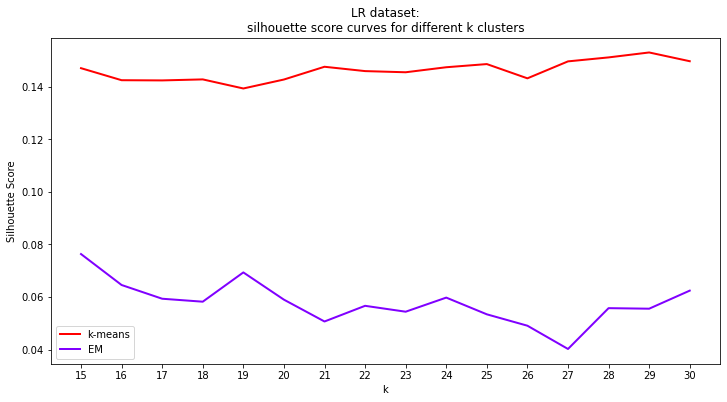

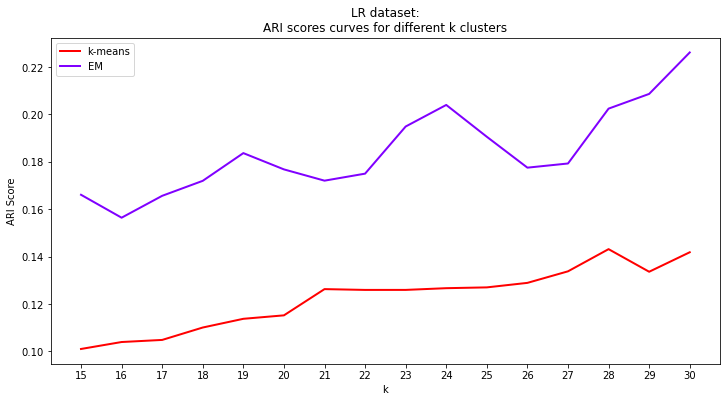

In [78]:
test1(X, Y, 15, 30, "LR dataset")

In [44]:
#PCA select the right number of components first

In [96]:
X.shape

(20000, 16)

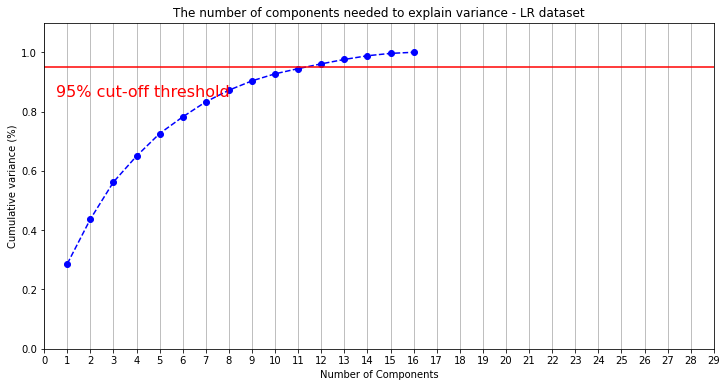

In [79]:
pca = PCA().fit(X)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 17, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 30, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance - LR dataset')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [105]:
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import GaussianRandomProjection
def test2(X, y, N, name, dataset):
    print('\n' + '-'*20 + 'experiment2: ' + name + '\n')

    scaler = StandardScaler()
    scaler.fit(X)

    err0 = np.zeros(N-1)
    err1 = np.zeros(N-1)
    err2 = np.zeros(N-1)
    err3 = np.zeros(N-1)

    for i in range(1, N):
        print('\nkeep components = %d' % i)
        #print(data)
        # ------PCA
        print('\nPCA:')
        pca = PCA(n_components=i)
        output_X = pca.fit_transform(X)

        eigvals = np.linalg.eigvals(pca.get_covariance())
        expl_var = sum(pca.explained_variance_ratio_)
        R = scaler.inverse_transform(pca.inverse_transform(output_X))  # Reconstruction
        R_error = sum(map(np.linalg.norm, R-X))
        # print('Eigenvalues:')
        # print('{}'.format(eigvals))
        print('Explained variance (%): {}'.format(expl_var))
        print('Reconstruction error: {}'.format(R_error))

        err0[i-1] = R_error

        #------ICA
        print('ICA:')
        ica = FastICA(n_components=i)
        output_X = ica.fit_transform(X)

        R = scaler.inverse_transform(ica.inverse_transform(output_X))
        R_error = sum(map(np.linalg.norm, R - X))
        print('Reconstruction error: {}'.format(R_error))
        err1[i - 1] = R_error

        #-------RP
        print('RP: ')
        rp = GaussianRandomProjection(n_components=i)
        output_X = rp.fit_transform(X)

        inv = np.linalg.pinv(rp.components_)
        R = scaler.inverse_transform(np.dot(output_X, inv.T))  # Reconstruction
        R_error = sum(map(np.linalg.norm, R-X))
        print('Reconstruction error: {}'.format(R_error))
        err2[i - 1] = R_error

        #-------SVD
        print('SVD: ')
        svd = TruncatedSVD(n_components=i)
        output_X = svd.fit_transform(X)
        R = scaler.inverse_transform(svd.inverse_transform(output_X))  # Reconstruction
        R_error = sum(map(np.linalg.norm, R - X))
        print('Reconstruction error: {}'.format(R_error))
        err3[i - 1] = R_error

    plot_curves(np.arange(1, N), (err0, err1, err2, err3), 'keep components', 'Reconstruction Error', ('PCA', 'ICA', 'Random Projection', 'SVD'),
                ''+ dataset + ':\nReconstruction Error for components analysis', 'figures/test2_'+ dataset + '.png')



--------------------experiment2: test


keep components = 1

PCA:
Explained variance (%): 0.2867616767762494
Reconstruction error: 12378.141248632355
ICA:
Reconstruction error: 12378.14124862649
RP: 
Reconstruction error: 11744.481683752636
SVD: 
Reconstruction error: 12689.983324088174

keep components = 2

PCA:
Explained variance (%): 0.4374480757613982
Reconstruction error: 12125.552725492667
ICA:
Reconstruction error: 12125.552349116895
RP: 
Reconstruction error: 11797.92862583262
SVD: 
Reconstruction error: 12297.660505305541

keep components = 3

PCA:
Explained variance (%): 0.5625145847343389
Reconstruction error: 11895.487581642565
ICA:
Reconstruction error: 11895.487491694963
RP: 


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Reconstruction error: 11574.24316577864
SVD: 
Reconstruction error: 12066.971497802873

keep components = 4

PCA:
Explained variance (%): 0.6500276918115331
Reconstruction error: 11735.972285742468
ICA:
Reconstruction error: 11735.971840746972
RP: 
Reconstruction error: 11536.676774439404
SVD: 
Reconstruction error: 11835.188696457497

keep components = 5

PCA:
Explained variance (%): 0.7260425861366613
Reconstruction error: 11585.937130588785
ICA:
Reconstruction error: 11585.937124452188
RP: 
Reconstruction error: 11310.144132728952
SVD: 
Reconstruction error: 11686.023061813623

keep components = 6

PCA:
Explained variance (%): 0.7821794634486581
Reconstruction error: 11480.208694220535
ICA:
Reconstruction error: 11480.208694220535
RP: 
Reconstruction error: 11414.107259429438
SVD: 
Reconstruction error: 11535.869520415717

keep components = 7

PCA:
Explained variance (%): 0.8329433502500379
Reconstruction error: 11407.458612809853
ICA:
Reconstruction error: 11407.458612809853
RP: 
R

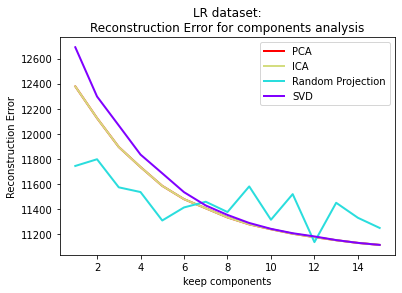

In [119]:
test2(X, Y, X.shape[1], 'test', 'LR dataset')

In [104]:
def test3(X, y, n_labels, interval, n_features, dataset):

    projections = (PCA, FastICA, GaussianRandomProjection, TruncatedSVD)

    arange = np.arange(1, n_features, interval)

    score0 = np.zeros(len(arange))
    score1 = np.zeros(len(arange))
    score2 = np.zeros(len(arange))
    score3 = np.zeros(len(arange))

    scores = (score0, score1, score2, score3)

    index = -1

    print(arange)
    km = KMeans(n_clusters=n_labels, random_state=10)
    output_y = km.fit_predict(X)
    sc = metrics.adjusted_rand_score(y, output_y)
    print(sc)

    print('-'*20 + 'start KM:\n')
    for i in arange:
        index = index+1
        for (pro, sco) in zip(projections, scores):
            projection = pro(n_components=i)
            new_X = projection.fit_transform(X)

            km = KMeans(n_clusters=n_labels)
            output_y = km.fit_predict(new_X)
            #sco[index] = metrics.adjusted_mutual_info_score(y, output_y)
            sco[index] = metrics.adjusted_rand_score(y, output_y)
            #sco[index] = metrics.v_measure_score(y, output_y)


    plot_curves(arange, (score0, score1, score2, score3), 'keep components', 'ARI score', ('PCA', 'ICA', 'Random Projection', 'SVD'),
                '' + dataset + ':\nARI scores for different projections in k-means', 'figures/test3_'+ dataset + '_km.png',flag=True, dotline=sc, line_label='raw data')

    index = -1
    print('-'*20 + 'start EM:')
    for i in arange:
        index = index+1
        for (pro, sco) in zip(projections, scores):
            projection = pro(n_components=i)
            new_X = projection.fit_transform(X)

            em = mixture.GaussianMixture(n_components=n_labels)
            em.fit(new_X)
            output_y = em.predict(new_X)
            #sco[index] = metrics.adjusted_mutual_info_score(y, output_y)
            sco[index] = metrics.adjusted_rand_score(y, output_y)
            #sco[index] = metrics.v_measure_score(y, output_y)

    em = mixture.GaussianMixture(n_components=n_labels, random_state=10)
    em.fit(X)
    output_y = em.predict(X)
    sc = metrics.adjusted_rand_score(y, output_y)
    print(sc)
    plot_curves(arange, (score0, score1, score2, score3), 'keep components', 'ARI score', ('PCA', 'ICA', 'Random Projection', 'SVD'),
                ''+ dataset + ':\nARI scores for features reduction algorithms in EM', 'figures/test3_' + dataset + '_em.png',flag=True, dotline=sc, line_label='raw data')


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
0.12699766069147
--------------------start KM:



/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[0.12699766 0.12699766 0.12699766 0.12699766 0.12699766 0.12699766
 0.12699766 0.12699766 0.12699766 0.12699766 0.12699766 0.12699766
 0.12699766 0.12699766 0.12699766]
--------------------start EM:


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


0.19058756979514857
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[0.19058757 0.19058757 0.19058757 0.19058757 0.19058757 0.19058757
 0.19058757 0.19058757 0.19058757 0.19058757 0.19058757 0.19058757
 0.19058757 0.19058757 0.19058757]


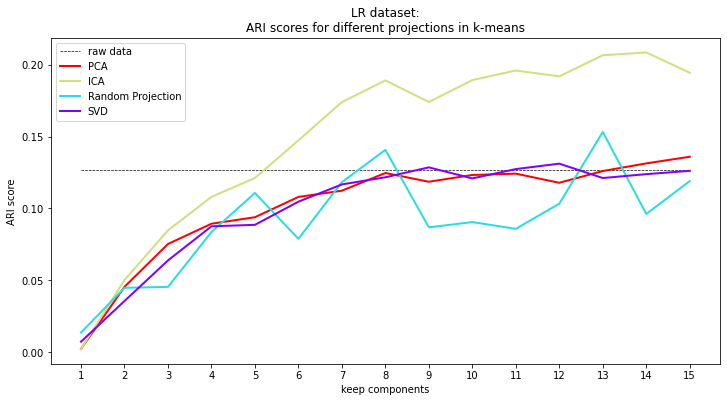

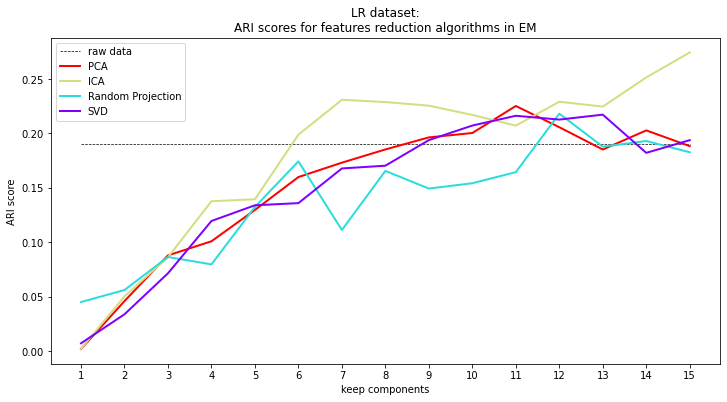

In [95]:
test3(X, Y, 25, 1, X.shape[1], 'LR dataset')

In [98]:
import time
from sklearn.neural_network import MLPClassifier
import pandas
import numpy as np
import matplotlib.pyplot as plt
import time


from sklearn.cluster import KMeans

from sklearn.datasets import load_digits

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

from sklearn.mixture import GaussianMixture

from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import GaussianRandomProjection

from sklearn.random_projection import GaussianRandomProjection

from sklearn.neural_network import MLPClassifier

from sklearn import metrics
def test4and5(train_X, train_y, test_X, test_y, start,n_features, interval):
    projections = (PCA, FastICA, GaussianRandomProjection, TruncatedSVD)
    names = ('PCA', 'ICA', 'RP', 'SVD')
    arange = np.arange(start, n_features, interval)

    train0 = np.zeros(len(arange))
    train1 = np.zeros(len(arange))
    train2 = np.zeros(len(arange))
    train3 = np.zeros(len(arange))
    train_scores = (train0, train1, train2, train3)

    test0 = np.zeros(len(arange))
    test1 = np.zeros(len(arange))
    test2 = np.zeros(len(arange))
    test3 = np.zeros(len(arange))
    test_scores = (test0, test1, test2, test3)


    km_test0 = np.zeros(len(arange))
    km_test1 = np.zeros(len(arange))
    km_test2 = np.zeros(len(arange))
    km_test3 = np.zeros(len(arange))
    km_test_scores = (km_test0, km_test1, km_test2, km_test3)

    km_train0 = np.zeros(len(arange))
    km_train1 = np.zeros(len(arange))
    km_train2 = np.zeros(len(arange))
    km_train3 = np.zeros(len(arange))
    km_train_scores = (km_train0, km_train1, km_train2, km_train3)

    em_train0 = np.zeros(len(arange))
    em_train1 = np.zeros(len(arange))
    em_train2 = np.zeros(len(arange))
    em_train3 = np.zeros(len(arange))
    em_train_scores = (em_train0, em_train1, em_train2, em_train3)

    em_test0 = np.zeros(len(arange))
    em_test1 = np.zeros(len(arange))
    em_test2 = np.zeros(len(arange))
    em_test3 = np.zeros(len(arange))
    em_test_scores = (em_test0, em_test1, em_test2, em_test3)

    time0 = np.zeros(len(arange))
    time1 = np.zeros(len(arange))
    time2 = np.zeros(len(arange))
    time3 = np.zeros(len(arange))

    times = (time0, time1, time2, time3)

    index = -1

    for i in arange:
        index = index+1
        print('')
        print('keep components %d:' % i)
        for (pro, train_s, test_s, km_train, km_test, em_train, em_test, t, name) in zip(
                projections, train_scores, test_scores, km_train_scores,
                km_test_scores, em_train_scores, em_test_scores, times, names):

            print('--------%s:' % name)
            projection = pro(n_components=i)
            projection.fit(train_X)
            train_new_X = projection.transform(train_X)
            test_new_X = projection.transform(test_X)

            start_time = time.time()

            NN = MLPClassifier()
            NN.fit(train_new_X, train_y)
            output_y = NN.predict(train_new_X)
            train_s[index] = metrics.accuracy_score(train_y, output_y) * 100
            output_y = NN.predict(test_new_X)
            test_s[index] = metrics.accuracy_score(test_y, output_y) * 100

            end_time = time.time()

            t[index] = end_time - start_time

            print('test 4: train_score=%.2f%%, test_score=%.2f%%, time=%.2f' % (train_s[index], test_s[index], t[index]))

            cl = KMeans(n_clusters=10)
            cl.fit(train_new_X)
            test5_train_X = make_array(cl, train_new_X, i)

            NN = MLPClassifier()
            NN.fit(test5_train_X, train_y)
            output_y = NN.predict(test5_train_X)

            km_train[index] = metrics.accuracy_score(train_y, output_y) * 100

            test5_test_X = make_array(cl, test_new_X, i)
            output_y = NN.predict(test5_test_X)
            km_test[index] = metrics.accuracy_score(test_y, output_y) * 100

            cl = GaussianMixture(n_components=10)
            cl.fit(train_new_X)
            test5_train_X = make_array(cl, train_new_X, i)

            NN = MLPClassifier()
            NN.fit(test5_train_X, train_y)
            output_y = NN.predict(test5_train_X)

            em_train[index] = metrics.accuracy_score(train_y, output_y) * 100

            test5_test_X = make_array(cl, test_new_X, i)
            output_y = NN.predict(test5_test_X)
            em_test[index] = metrics.accuracy_score(test_y, output_y) * 100

            print('test 5: KM: train_score=%.2f%%, test_score=%.2f%%' % (km_train[index], km_test[index]))
            print('test 5: EM: train_score=%.2f%%, test_score=%.2f%%' % (em_train[index], em_test[index]))



    start_time = time.time()
    NN = MLPClassifier()
    NN.fit(train_X, train_y)
    output_y = NN.predict(train_X)
    acc = metrics.accuracy_score(train_y, output_y) * 100
    print('training accuracy = %.2f%%' % acc)
    output_y = NN.predict(test_X)
    acc = metrics.accuracy_score(test_y, output_y) * 100
    tot_time = time.time() - start_time
    print('testing accuracy = %.2f%%' % acc)
    print('total time = %fs' % tot_time)

    plot_curves(arange, (time0, time1, time2, time3), 'keep components', 'time(s)',
                ('PCA', 'ICA', 'Random Projection', 'SVD'),
                'test4:\ntotal running time for different features reduction algorithms',
                'figures/test4_time.png', flag=True, dotline=tot_time, line_label='raw data')

    plot_curves(arange, (train0, test0, km_train0, km_test0, em_train0, em_test0),
                'keep_components', 'accuracy(%)',
                ('test4: train accuracy', 'test4: test accuracy',
                 'test5: train accuracy(k-means)', 'test5: test accuracy(k-means)',
                 'test5: train accuracy(EM)', 'test5: test accuracy(EM)'),
                'test4 and test5:\ntraining and testing accuracy for PCA',
                'figures/test4_PCA.png', flag=True, dotline=acc, line_label='test accuracy of raw data', show100=True)

    plot_curves(arange, (train1, test1, km_train1, km_test1, em_train1, em_test1),
                'keep_components', 'accuracy(%)',
                ('test4: train accuracy', 'test4: test accuracy',
                 'test5: train accuracy(k-means)', 'test5: test accuracy(k-means)',
                 'test5: train accuracy(EM)', 'test5: test accuracy(EM)'),
                'test4 and test5:\ntraining and testing accuracy for ICA',
                'figures/test4_ICA.png', flag=True, dotline=acc, line_label='test accuracy of raw data', show100=True)

    plot_curves(arange, (train2, test2, km_train2, km_test2, em_train2, em_test2),
                'keep_components', 'accuracy(%)',
                ('test4: train accuracy', 'test4: test accuracy',
                 'test5: train accuracy(k-means)', 'test5: test accuracy(k-means)',
                 'test5: train accuracy(EM)', 'test5: test accuracy(EM)'),
                'test4 and test5:\ntraining and testing accuracy for Random Projection',
                'figures/test4_RP.png', flag=True, dotline=acc, line_label='test accuracy of raw data', show100=True)

    plot_curves(arange, (train3, test3, km_train3, km_test3, em_train3, em_test3),
                'keep_components', 'accuracy(%)',
                ('test4: train accuracy', 'test4: test accuracy',
                 'test5: train accuracy(k-means)', 'test5: test accuracy(k-means)',
                 'test5: train accuracy(EM)', 'test5: test accuracy(EM)'),
                'test4 and test5:\ntraining and testing accuracy for SVD',
                'figures/test4_SVD.png', flag=True, dotline=acc, line_label='test accuracy of raw data', show100=True)

In [99]:
names = ['class',
         'x-box',
         'y-box',
         'width',
         'high',
         'onpix',
         'x-bar',
         'y-bar',
         'x2bar',
         'y2bar',
         'xybar',
         'x2ybr',
         'xy2br',
         'x-ege',
         'xegvy',
         'y-ege',
         'yegvx']
dataset = pd.read_csv('/Users/balu/dev/GATech/GATECH-7641/assignment1/data/letter-recognition.data', names=names)

# Return the dimensionality of the DataFrame
# print(dataset.shape)

# Generates descriptive statistics
# print(dataset.describe())

# class distribution
# print(dataset.groupby('class').size())

# histograms
# dataset.hist()
# plt.show()

array = dataset.values

X = array[:, 1:17]
Y = array[:, 0]
le = preprocessing.LabelEncoder()
Y = le.fit_transform(Y)
n_digits = len(Y)

In [100]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [102]:
def make_array(clustering, X, n_components):
    size = len(X)
    new_X = np.zeros((size, n_components + 1))
    new_X[:, 0:n_components] = X
    new_X[:, n_components] = clustering.predict(X)

    return new_X


keep components 1:
--------PCA:
test 4: train_score=5.87%, test_score=5.58%, time=6.80
test 5: KM: train_score=6.34%, test_score=5.52%
test 5: EM: train_score=6.23%, test_score=5.77%
--------ICA:
test 4: train_score=5.24%, test_score=5.23%, time=3.28
test 5: KM: train_score=5.85%, test_score=5.67%
test 5: EM: train_score=5.93%, test_score=5.17%
--------RP:


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 4: train_score=12.06%, test_score=12.61%, time=9.41


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 5: KM: train_score=12.28%, test_score=12.64%
test 5: EM: train_score=12.69%, test_score=12.74%
--------SVD:
test 4: train_score=7.99%, test_score=7.55%, time=9.32


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 5: KM: train_score=8.26%, test_score=7.36%
test 5: EM: train_score=8.41%, test_score=7.88%

keep components 5:
--------PCA:


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 4: train_score=65.81%, test_score=64.08%, time=9.43


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 5: KM: train_score=62.15%, test_score=60.44%
test 5: EM: train_score=64.19%, test_score=62.79%
--------ICA:


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 4: train_score=47.83%, test_score=48.21%, time=9.27


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 5: KM: train_score=46.46%, test_score=46.27%
test 5: EM: train_score=49.41%, test_score=49.23%
--------RP:


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 4: train_score=53.03%, test_score=51.64%, time=9.76


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 5: KM: train_score=53.39%, test_score=51.86%
test 5: EM: train_score=53.60%, test_score=52.50%
--------SVD:


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 4: train_score=54.29%, test_score=53.92%, time=9.22


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 5: KM: train_score=57.35%, test_score=56.58%
test 5: EM: train_score=57.03%, test_score=56.61%

keep components 9:
--------PCA:


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 4: train_score=86.71%, test_score=85.12%, time=10.43


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 5: KM: train_score=84.60%, test_score=83.14%
test 5: EM: train_score=82.31%, test_score=80.97%
--------ICA:


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 4: train_score=67.71%, test_score=67.92%, time=9.16


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 5: KM: train_score=68.56%, test_score=68.44%
test 5: EM: train_score=69.13%, test_score=68.92%
--------RP:


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 4: train_score=73.55%, test_score=73.18%, time=9.65


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 5: KM: train_score=74.04%, test_score=72.88%
test 5: EM: train_score=73.60%, test_score=72.55%
--------SVD:


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 4: train_score=81.46%, test_score=80.62%, time=9.63


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 5: KM: train_score=81.45%, test_score=80.61%
test 5: EM: train_score=80.64%, test_score=79.20%

keep components 13:
--------PCA:


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 4: train_score=93.48%, test_score=91.21%, time=9.72


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 5: KM: train_score=90.90%, test_score=88.68%
test 5: EM: train_score=91.94%, test_score=90.14%
--------ICA:


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 4: train_score=75.78%, test_score=75.97%, time=9.83


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 5: KM: train_score=76.10%, test_score=76.26%
test 5: EM: train_score=79.01%, test_score=77.79%
--------RP:


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 4: train_score=77.31%, test_score=76.67%, time=9.70


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 5: KM: train_score=76.49%, test_score=74.68%
test 5: EM: train_score=78.48%, test_score=77.58%
--------SVD:


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 4: train_score=89.19%, test_score=87.58%, time=9.95


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 5: KM: train_score=87.80%, test_score=86.18%
test 5: EM: train_score=88.98%, test_score=87.27%


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


training accuracy = 86.59%
testing accuracy = 85.55%
total time = 9.732702s
[ 1  5  9 13]
[9.73270202 9.73270202 9.73270202 9.73270202]
[ 1  5  9 13]
[85.54545455 85.54545455 85.54545455 85.54545455]
[ 1  5  9 13]
[85.54545455 85.54545455 85.54545455 85.54545455]
[ 1  5  9 13]
[85.54545455 85.54545455 85.54545455 85.54545455]
[ 1  5  9 13]
[85.54545455 85.54545455 85.54545455 85.54545455]


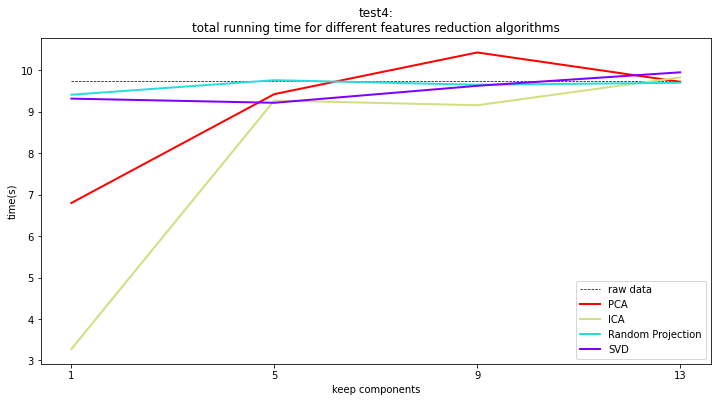

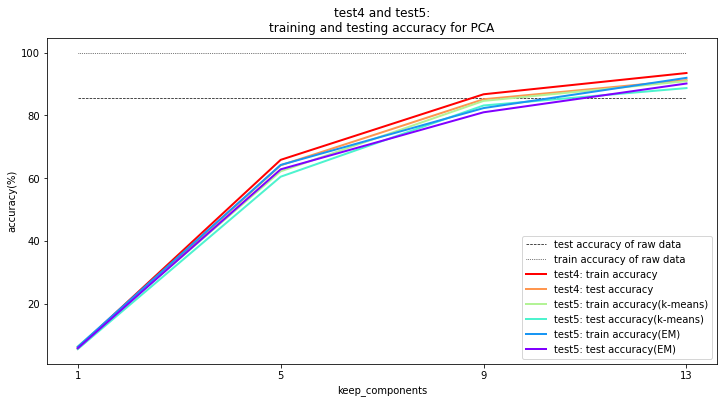

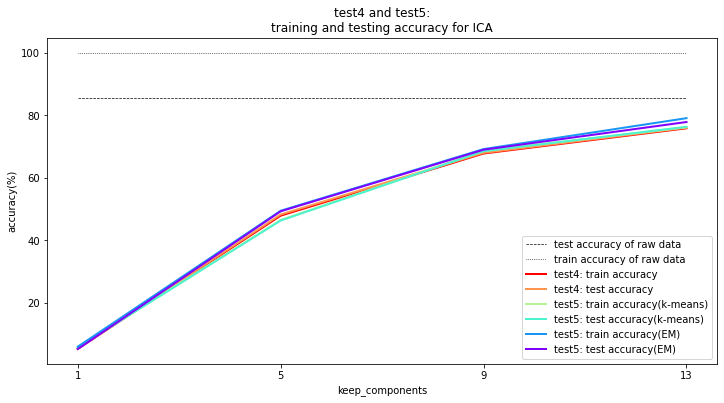

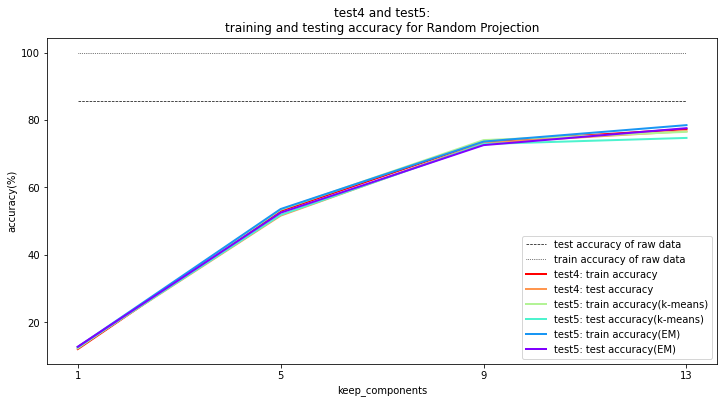

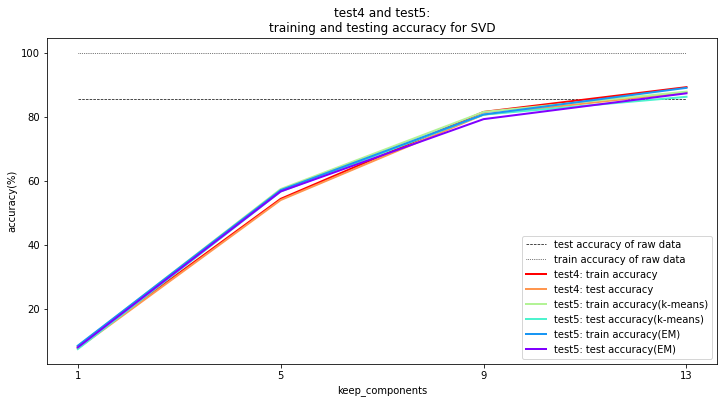

In [103]:
test4and5(X_train, y_train, X_test, y_test, 1, 16, 4)

In [22]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn import preprocessing

from keras.models import Sequential
from keras.layers import Dense, Activation

import matplotlib.pyplot as plt
def get_normalized_data(dataset_path):
    print("Reading in and transforming data...")

    if not os.path.exists(dataset_path):
        exit()

    Xtrain, Xtest, Ytrain, Ytest = get_data_train_test(dataset_path)
    Xtrain = Xtrain.astype(np.float)
    # normalize the data
    mu = Xtrain.mean(axis=0)
    std = Xtrain.std(axis=0)
    np.place(std, std == 0, 1)
    Xtrain = (Xtrain - mu) / std
    Xtest = (Xtest - mu) / std

    return Xtrain, Xtest, Ytrain, Ytest

In [23]:
def y2indicator(y):
    N = len(y)
    Yset = len(set(y))
    y = y.astype(np.int32)
    ind = np.zeros((N, Yset+1))
    for i in range(N):
        ind[i, y[i]] = 1
    return ind

In [24]:
def get_data_train_test(dataset_path):
    if "letter" in dataset_path:
        df = pd.read_csv('/Users/balu/dev/GATech/GATECH-7641/assignment1/data/letter-recognition.data')
        names = ['class',
                 'x-box',
                 'y-box',
                 'width',
                 'high',
                 'onpix',
                 'x-bar',
                 'y-bar',
                 'x2bar',
                 'y2bar',
                 'xybar',
                 'x2ybr',
                 'xy2br',
                 'x-ege',
                 'xegvy',
                 'y-ege',
                 'yegvx']
        dataset = pd.read_csv('/Users/balu/dev/GATech/GATECH-7641/assignment1/data/letter-recognition.data', names=names)

        # Return the dimensionality of the DataFrame
        # print(dataset.shape)

        # Generates descriptive statistics
        # print(dataset.describe())

        # class distribution
        # print(dataset.groupby('class').size())

        # histograms
        # dataset.hist()
        # plt.show()

        array = dataset.values

        X = array[:, 1:17]
        Y = array[:, 0]
        le = preprocessing.LabelEncoder()
        Y = le.fit_transform(Y)
        X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.20,
                                                                            random_state=10, stratify=Y)
    else:
        df = pd.read_csv('./data/wifi_localization.txt')
        df = df.iloc[1:]
        data = df.values.astype(np.float32)
        np.random.shuffle(data)
        X = data[:, :-1]
        Y = data[:, -1]

        X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.20,
                                                                            random_state=10, stratify=Y)

    return X_train, X_test, Y_train, Y_test

In [25]:
# https://deeplearningcourses.com/c/data-science-deep-learning-in-theano-tensorflow
# https://www.udemy.com/data-science-deep-learning-in-theano-tensorflow
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

from keras.models import Sequential
from keras.layers import Dense, Activation

import matplotlib.pyplot as plt


# NOTE: do NOT name your file keras.py because it will conflict
# with importing keras

# installation is easy! just the usual "sudo pip(3) install keras"

def ANN(dataset_path):
    # get the data, same as Theano + Tensorflow examples
    # no need to split now, the fit() function will do it
    Xtrain, Xtest, Ytrain, Ytest = get_normalized_data(dataset_path)
    # get shapes
    N, D = Xtrain.shape

    K = len(set(Ytrain))
    # by default Keras wants one-hot encoded labels
    # there's another cost function we can use
    # where we can just pass in the integer labels directly
    # just like Tensorflow / Theano
    Ytrain = y2indicator(Ytrain)
    Ytest = y2indicator(Ytest)

    # the model will be a sequence of layers
    model3 = Sequential()

    model3.add(Dense(units=100, input_dim=D))
    model3.add(Activation('relu'))
    model3.add(Dense(units=50))  # don't need to specify input_dim
    model3.add(Activation('relu'))
    model3.add(Dense(units=K + 1))
    model3.add(Activation('softmax'))

    # list of losses: https://keras.io/losses/
    # list of optimizers: https://keras.io/optimizers/
    # list of metrics: https://keras.io/metrics/
    model3.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )


    # note: multiple ways to choose a backend
    # either theano, tensorflow, or cntk
    # https://keras.io/backend/

    # gives us back a <keras.callbacks.History object at 0x112e61a90>
    r3 = model3.fit(Xtrain, Ytrain, validation_data=(Xtest, Ytest), epochs=100, batch_size=100)
    print("Returned:", r3)

    # print the available keys
    # should see: dict_keys(['val_loss', 'acc', 'loss', 'val_acc'])
    print(r3.history.keys())

    # plot some data
    plt.title("loss vs val_loss")
    plt.xlabel('epochs')
    leg = plt.legend()
    # get the lines and texts inside legend box
    leg_lines = leg.get_lines()
    leg_texts = leg.get_texts()
    plt.setp(leg_lines, linewidth=4)
    plt.setp(leg_texts, fontsize='x-large')
    plt.plot(r3.history['loss'], label='loss-L100-50')
    plt.plot(r3.history['val_loss'], label='val_loss-L100-50')
    plt.legend()
    plt.show()

    # accuracies
    plt.title("Accuracy: train vs validation")
    plt.xlabel('epochs')
    leg = plt.legend()
    # get the lines and texts inside legend box
    leg_lines = leg.get_lines()
    leg_texts = leg.get_texts()
    plt.setp(leg_lines, linewidth=4)
    plt.setp(leg_texts, fontsize='x-large')
    plt.plot(r3.history['accuracy'], label='acc-L100-50')
    plt.plot(r3.history['val_accuracy'], label='val_acc-L100-50')
    plt.legend()
    plt.show()




Reading in and transforming data...

Train on 16000 samples, validate on 4000 samples
Epoch 1/100
16000/16000 [==============================] - 1s 53us/step - loss: 2.1704 - accuracy: 0.4285 - val_loss: 1.2969 - val_accuracy: 0.6670
Epoch 2/100
16000/16000 [==============================] - 0s 24us/step - loss: 1.0350 - accuracy: 0.7208 - val_loss: 0.8803 - val_accuracy: 0.7615
Epoch 3/100
16000/16000 [==============================] - 0s 24us/step - loss: 0.7699 - accuracy: 0.7830 - val_loss: 0.7097 - val_accuracy: 0.8080
Epoch 4/100
16000/16000 [==============================] - 0s 24us/step - loss: 0.6318 - accuracy: 0.8214 - val_loss: 0.5985 - val_accuracy: 0.8325
Epoch 5/100
16000/16000 [==============================] - 0s 24us/step - loss: 0.5417 - accuracy: 0.8478 - val_loss: 0.5267 - val_accuracy: 0.8505
Epoch 6/100
16000/16000 [==============================] - 0s 24us/step - loss: 0.4746 - accuracy: 0.8668 - val_loss: 0.4707 - val_accuracy: 0.8618
Epoch 7/100
16000/16000 [=

Epoch 54/100
16000/16000 [==============================] - 0s 24us/step - loss: 0.0570 - accuracy: 0.9848 - val_loss: 0.1468 - val_accuracy: 0.9505
Epoch 55/100
16000/16000 [==============================] - 0s 24us/step - loss: 0.0532 - accuracy: 0.9851 - val_loss: 0.1548 - val_accuracy: 0.9500
Epoch 56/100
16000/16000 [==============================] - 0s 24us/step - loss: 0.0525 - accuracy: 0.9863 - val_loss: 0.1397 - val_accuracy: 0.9555
Epoch 57/100
16000/16000 [==============================] - 0s 24us/step - loss: 0.0507 - accuracy: 0.9866 - val_loss: 0.1411 - val_accuracy: 0.9538
Epoch 58/100
16000/16000 [==============================] - 0s 24us/step - loss: 0.0482 - accuracy: 0.9877 - val_loss: 0.1496 - val_accuracy: 0.9507
Epoch 59/100
16000/16000 [==============================] - 0s 24us/step - loss: 0.0483 - accuracy: 0.9872 - val_loss: 0.1471 - val_accuracy: 0.9500
Epoch 60/100
16000/16000 [==============================] - 0s 24us/step - loss: 0.0458 - accuracy: 0.9882

No handles with labels found to put in legend.


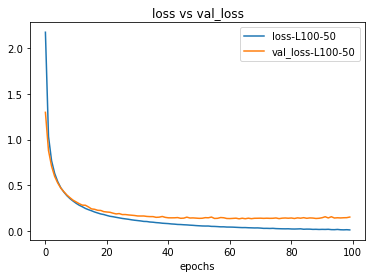

No handles with labels found to put in legend.


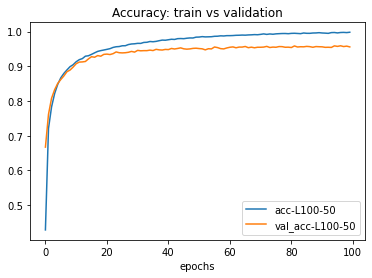

In [7]:
ANN("letter")

In [77]:
# https://deeplearningcourses.com/c/data-science-deep-learning-in-theano-tensorflow
# https://www.udemy.com/data-science-deep-learning-in-theano-tensorflow
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

from keras.models import Sequential
from keras.layers import Dense, Activation

import matplotlib.pyplot as plt


# NOTE: do NOT name your file keras.py because it will conflict
# with importing keras

# installation is easy! just the usual "sudo pip(3) install keras"

def ANN(Xtrain, Xtest, Ytrain, Ytest, algo, component):
    # get the data, same as Theano + Tensorflow examples
    # no need to split now, the fit() function will do it
    # get shapes
    N, D = Xtrain.shape

    K = len(set(Ytrain))
    # by default Keras wants one-hot encoded labels
    # there's another cost function we can use
    # where we can just pass in the integer labels directly
    # just like Tensorflow / Theano
    Ytrain = y2indicator(Ytrain)
    Ytest = y2indicator(Ytest)

    # the model will be a sequence of layers
    model3 = Sequential()

    model3.add(Dense(units=100, input_dim=D))
    model3.add(Activation('relu'))
    model3.add(Dense(units=50))  # don't need to specify input_dim
    model3.add(Activation('relu'))
    model3.add(Dense(units=K + 1))
    model3.add(Activation('softmax'))

    # list of losses: https://keras.io/losses/
    # list of optimizers: https://keras.io/optimizers/
    # list of metrics: https://keras.io/metrics/
    model3.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )


    # note: multiple ways to choose a backend
    # either theano, tensorflow, or cntk
    # https://keras.io/backend/

    # gives us back a <keras.callbacks.History object at 0x112e61a90>
    r3 = model3.fit(Xtrain, Ytrain, validation_data=(Xtest, Ytest), epochs=100, batch_size=100)
    print("Returned:", r3)

    # print the available keys
    # should see: dict_keys(['val_loss', 'acc', 'loss', 'val_acc'])
    print(r3.history.keys())

    # plot some data
    plt.title("loss vs val_loss - "+str(algo)+" : Component: "+str(component) )
    plt.xlabel('epochs')
    leg = plt.legend()
    # get the lines and texts inside legend box
    leg_lines = leg.get_lines()
    leg_texts = leg.get_texts()
    plt.setp(leg_lines, linewidth=4)
    plt.setp(leg_texts, fontsize='x-large')
    plt.plot(r3.history['loss'], label='loss')
    plt.plot(r3.history['val_loss'], label='val_loss')
    plt.legend()
    plt.show()

    # accuracies
    plt.title("Accuracy: train vs validation - "+str(algo)+" : Component: "+str(component) )
    plt.xlabel('epochs')
    leg = plt.legend()
    # get the lines and texts inside legend box
    leg_lines = leg.get_lines()
    leg_texts = leg.get_texts()
    plt.setp(leg_lines, linewidth=4)
    plt.setp(leg_texts, fontsize='x-large')
    plt.plot(r3.history['accuracy'], label='acc')
    plt.plot(r3.history['val_accuracy'], label='val_acc-')
    plt.legend()
    plt.show()




In [78]:
# Load libraries
import datetime as dt

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn import preprocessing
names = ['class',
         'x-box',
         'y-box',
         'width',
         'high',
         'onpix',
         'x-bar',
         'y-bar',
         'x2bar',
         'y2bar',
         'xybar',
         'x2ybr',
         'xy2br',
         'x-ege',
         'xegvy',
         'y-ege',
         'yegvx']
dataset = pd.read_csv('/Users/balu/dev/GATech/GATECH-7641/assignment1/data/letter-recognition.data', names=names)

# Return the dimensionality of the DataFrame
# print(dataset.shape)

# Generates descriptive statistics
# print(dataset.describe())

# class distribution
# print(dataset.groupby('class').size())

# histograms
# dataset.hist()
# plt.show()

array = dataset.values

X = array[:, 1:17]
Y = array[:, 0]
le = preprocessing.LabelEncoder()
Y = le.fit_transform(Y)
n_digits = len(Y)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [88]:

from sklearn.cluster import KMeans

from sklearn.datasets import load_digits

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

from sklearn.mixture import GaussianMixture

from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import GaussianRandomProjection

from sklearn.random_projection import GaussianRandomProjection

from sklearn.neural_network import MLPClassifier
def test3_fromassignment1(X, y, n_features, interval, component_list):

    projections = (PCA, FastICA, GaussianRandomProjection, TruncatedSVD)
    arange = np.arange(1, n_features, interval)

    score0 = np.zeros(len(arange))
    score1 = np.zeros(len(arange))
    score2 = np.zeros(len(arange))
    score3 = np.zeros(len(arange))
    index = -1

    scores = (score0, score1, score2, score3)

    print('-'*20 + 'start KM:\n')
    for pro in projections:
        for i in component_list:
            projection = pro(n_components=i)
            new_X = projection.fit_transform(X)
            new_X_train, new_X_test, Y_train, Y_test = model_selection.train_test_split(new_X, Y, test_size=0.20,
                                                                            random_state=10, stratify=Y)
            ANN(new_X_train, new_X_test, Y_train, Y_test, projection, i)

--------------------start KM:

Train on 16000 samples, validate on 4000 samples
Epoch 1/100
16000/16000 [==============================] - 1s 85us/step - loss: 2.6920 - accuracy: 0.3328 - val_loss: 1.8545 - val_accuracy: 0.5598
Epoch 2/100
16000/16000 [==============================] - 0s 30us/step - loss: 1.4393 - accuracy: 0.6385 - val_loss: 1.2158 - val_accuracy: 0.6908
Epoch 3/100
16000/16000 [==============================] - 0s 30us/step - loss: 1.0937 - accuracy: 0.7104 - val_loss: 1.0320 - val_accuracy: 0.7280
Epoch 4/100
16000/16000 [==============================] - 0s 30us/step - loss: 0.9640 - accuracy: 0.7379 - val_loss: 0.9439 - val_accuracy: 0.7433
Epoch 5/100
16000/16000 [==============================] - 0s 30us/step - loss: 0.8848 - accuracy: 0.7564 - val_loss: 0.8673 - val_accuracy: 0.7613
Epoch 6/100
16000/16000 [==============================] - 0s 30us/step - loss: 0.8289 - accuracy: 0.7716 - val_loss: 0.8181 - val_accuracy: 0.7763
Epoch 7/100
16000/16000 [=======

16000/16000 [==============================] - 0s 31us/step - loss: 0.1762 - accuracy: 0.9486 - val_loss: 0.2196 - val_accuracy: 0.9325
Epoch 56/100
16000/16000 [==============================] - 0s 29us/step - loss: 0.1721 - accuracy: 0.9507 - val_loss: 0.2192 - val_accuracy: 0.9325
Epoch 57/100
16000/16000 [==============================] - 0s 31us/step - loss: 0.1696 - accuracy: 0.9506 - val_loss: 0.2131 - val_accuracy: 0.9330
Epoch 58/100
16000/16000 [==============================] - 0s 29us/step - loss: 0.1665 - accuracy: 0.9515 - val_loss: 0.2085 - val_accuracy: 0.9355
Epoch 59/100
16000/16000 [==============================] - 1s 33us/step - loss: 0.1629 - accuracy: 0.9526 - val_loss: 0.2107 - val_accuracy: 0.9340
Epoch 60/100
16000/16000 [==============================] - 0s 30us/step - loss: 0.1612 - accuracy: 0.9531 - val_loss: 0.2085 - val_accuracy: 0.9327
Epoch 61/100
16000/16000 [==============================] - 1s 32us/step - loss: 0.1564 - accuracy: 0.9548 - val_loss: 

No handles with labels found to put in legend.


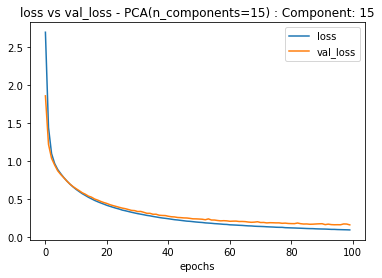

No handles with labels found to put in legend.


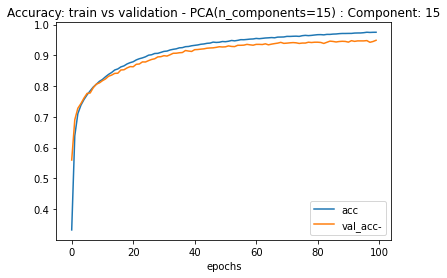

Train on 16000 samples, validate on 4000 samples
Epoch 1/100
16000/16000 [==============================] - 2s 95us/step - loss: 3.2594 - accuracy: 0.0625 - val_loss: 3.2066 - val_accuracy: 0.1252
Epoch 2/100
16000/16000 [==============================] - 0s 30us/step - loss: 3.0843 - accuracy: 0.2255 - val_loss: 2.8967 - val_accuracy: 0.3245
Epoch 3/100
16000/16000 [==============================] - 0s 30us/step - loss: 2.6190 - accuracy: 0.3623 - val_loss: 2.3578 - val_accuracy: 0.4013
Epoch 4/100
16000/16000 [==============================] - 1s 38us/step - loss: 2.1298 - accuracy: 0.4618 - val_loss: 1.9624 - val_accuracy: 0.5033
Epoch 5/100
16000/16000 [==============================] - 0s 29us/step - loss: 1.8238 - accuracy: 0.5209 - val_loss: 1.7310 - val_accuracy: 0.5468
Epoch 6/100
16000/16000 [==============================] - 0s 30us/step - loss: 1.6479 - accuracy: 0.5541 - val_loss: 1.5987 - val_accuracy: 0.5713
Epoch 7/100
16000/16000 [==============================] - 0s 2

Epoch 56/100
16000/16000 [==============================] - 0s 30us/step - loss: 0.7219 - accuracy: 0.7997 - val_loss: 0.7476 - val_accuracy: 0.7947
Epoch 57/100
16000/16000 [==============================] - 0s 30us/step - loss: 0.7165 - accuracy: 0.8008 - val_loss: 0.7373 - val_accuracy: 0.7972
Epoch 58/100
16000/16000 [==============================] - 0s 30us/step - loss: 0.7072 - accuracy: 0.8037 - val_loss: 0.7311 - val_accuracy: 0.8000
Epoch 59/100
16000/16000 [==============================] - 0s 30us/step - loss: 0.7023 - accuracy: 0.8054 - val_loss: 0.7246 - val_accuracy: 0.7977
Epoch 60/100
16000/16000 [==============================] - 0s 30us/step - loss: 0.6973 - accuracy: 0.8065 - val_loss: 0.7215 - val_accuracy: 0.8012
Epoch 61/100
16000/16000 [==============================] - 0s 30us/step - loss: 0.6901 - accuracy: 0.8074 - val_loss: 0.7130 - val_accuracy: 0.8035
Epoch 62/100
16000/16000 [==============================] - 0s 30us/step - loss: 0.6828 - accuracy: 0.8097

No handles with labels found to put in legend.


Returned: <keras.callbacks.callbacks.History object at 0x7f91e3bbe710>
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


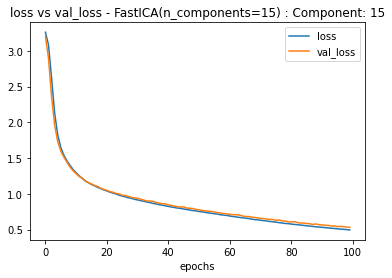

No handles with labels found to put in legend.


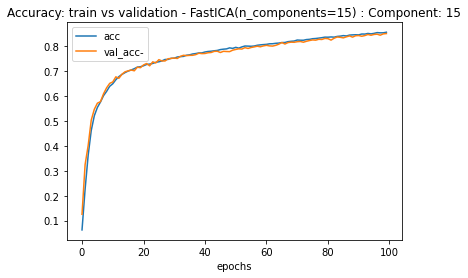

Train on 16000 samples, validate on 4000 samples
Epoch 1/100
16000/16000 [==============================] - 2s 98us/step - loss: 2.9956 - accuracy: 0.1966 - val_loss: 2.4701 - val_accuracy: 0.3347
Epoch 2/100
16000/16000 [==============================] - 1s 35us/step - loss: 2.0920 - accuracy: 0.4208 - val_loss: 1.8737 - val_accuracy: 0.4757
Epoch 3/100
16000/16000 [==============================] - 1s 34us/step - loss: 1.7302 - accuracy: 0.5111 - val_loss: 1.6619 - val_accuracy: 0.5400
Epoch 4/100
16000/16000 [==============================] - 1s 33us/step - loss: 1.5642 - accuracy: 0.5652 - val_loss: 1.5429 - val_accuracy: 0.5650
Epoch 5/100
16000/16000 [==============================] - 0s 30us/step - loss: 1.4566 - accuracy: 0.5962 - val_loss: 1.4567 - val_accuracy: 0.5993
Epoch 6/100
16000/16000 [==============================] - 1s 32us/step - loss: 1.3785 - accuracy: 0.6219 - val_loss: 1.3802 - val_accuracy: 0.6283
Epoch 7/100
16000/16000 [==============================] - 0s 3

Epoch 56/100
16000/16000 [==============================] - 0s 30us/step - loss: 0.5487 - accuracy: 0.8382 - val_loss: 0.5924 - val_accuracy: 0.8235
Epoch 57/100
16000/16000 [==============================] - 0s 30us/step - loss: 0.5427 - accuracy: 0.8418 - val_loss: 0.5682 - val_accuracy: 0.8338
Epoch 58/100
16000/16000 [==============================] - 0s 30us/step - loss: 0.5357 - accuracy: 0.8432 - val_loss: 0.5636 - val_accuracy: 0.8345
Epoch 59/100
16000/16000 [==============================] - 0s 30us/step - loss: 0.5304 - accuracy: 0.8447 - val_loss: 0.5585 - val_accuracy: 0.8345
Epoch 60/100
16000/16000 [==============================] - 1s 40us/step - loss: 0.5220 - accuracy: 0.8487 - val_loss: 0.5547 - val_accuracy: 0.8365
Epoch 61/100
16000/16000 [==============================] - 1s 37us/step - loss: 0.5180 - accuracy: 0.8478 - val_loss: 0.5500 - val_accuracy: 0.8382
Epoch 62/100
16000/16000 [==============================] - 0s 31us/step - loss: 0.5115 - accuracy: 0.8496

No handles with labels found to put in legend.


Returned: <keras.callbacks.callbacks.History object at 0x7f91f502e518>
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


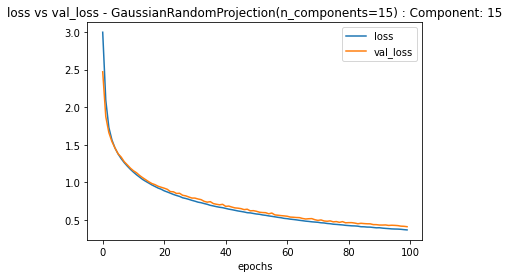

No handles with labels found to put in legend.


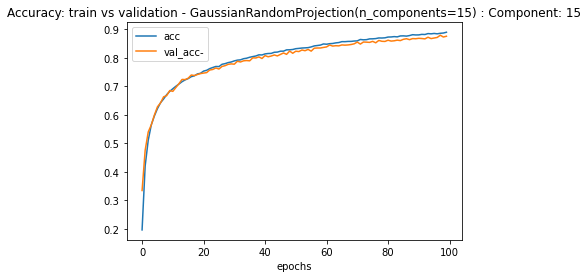

Train on 16000 samples, validate on 4000 samples
Epoch 1/100
16000/16000 [==============================] - 2s 97us/step - loss: 2.9404 - accuracy: 0.2272 - val_loss: 2.2733 - val_accuracy: 0.4200
Epoch 2/100
16000/16000 [==============================] - 1s 31us/step - loss: 1.7587 - accuracy: 0.5509 - val_loss: 1.4646 - val_accuracy: 0.6198
Epoch 3/100
16000/16000 [==============================] - 0s 31us/step - loss: 1.3026 - accuracy: 0.6549 - val_loss: 1.2117 - val_accuracy: 0.6745
Epoch 4/100
16000/16000 [==============================] - 0s 31us/step - loss: 1.1252 - accuracy: 0.6994 - val_loss: 1.0921 - val_accuracy: 0.7218
Epoch 5/100
16000/16000 [==============================] - 1s 31us/step - loss: 1.0281 - accuracy: 0.7232 - val_loss: 1.0078 - val_accuracy: 0.7377
Epoch 6/100
16000/16000 [==============================] - 1s 32us/step - loss: 0.9637 - accuracy: 0.7427 - val_loss: 0.9610 - val_accuracy: 0.7385
Epoch 7/100
16000/16000 [==============================] - 1s 3

Epoch 56/100
16000/16000 [==============================] - 0s 31us/step - loss: 0.2900 - accuracy: 0.9133 - val_loss: 0.3283 - val_accuracy: 0.8972
Epoch 57/100
16000/16000 [==============================] - 0s 31us/step - loss: 0.2843 - accuracy: 0.9159 - val_loss: 0.3297 - val_accuracy: 0.8980
Epoch 58/100
16000/16000 [==============================] - 0s 31us/step - loss: 0.2815 - accuracy: 0.9157 - val_loss: 0.3215 - val_accuracy: 0.9022
Epoch 59/100
16000/16000 [==============================] - 0s 31us/step - loss: 0.2788 - accuracy: 0.9151 - val_loss: 0.3171 - val_accuracy: 0.8997
Epoch 60/100
16000/16000 [==============================] - 0s 31us/step - loss: 0.2749 - accuracy: 0.9179 - val_loss: 0.3123 - val_accuracy: 0.9045
Epoch 61/100
16000/16000 [==============================] - 0s 31us/step - loss: 0.2694 - accuracy: 0.9212 - val_loss: 0.3088 - val_accuracy: 0.9040
Epoch 62/100
16000/16000 [==============================] - 0s 31us/step - loss: 0.2666 - accuracy: 0.9209

No handles with labels found to put in legend.


Returned: <keras.callbacks.callbacks.History object at 0x7f91f4df6860>
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


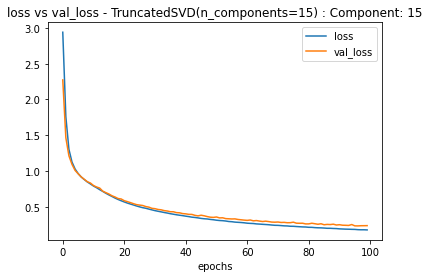

No handles with labels found to put in legend.


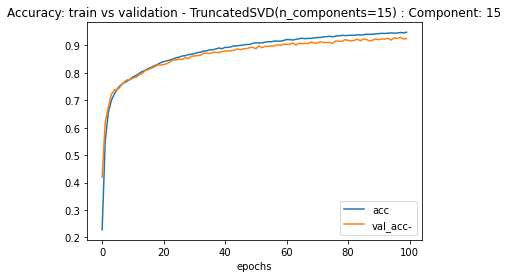

In [89]:
test3_fromassignment1(X, Y, 16, 1, [15])

In [113]:
import time
from sklearn.neural_network import MLPClassifier
import pandas
import numpy as np
import matplotlib.pyplot as plt
import time


from sklearn.cluster import KMeans

from sklearn.datasets import load_digits

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

from sklearn.mixture import GaussianMixture

from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import GaussianRandomProjection

from sklearn.random_projection import GaussianRandomProjection

from sklearn.neural_network import MLPClassifier

from sklearn import metrics
def test4and5(train_X, train_y, test_X, test_y, start,n_features, interval):
    projections = (PCA, FastICA, GaussianRandomProjection, TruncatedSVD)
    names = ('PCA', 'ICA', 'RP', 'SVD')
    arange = np.arange(start, n_features, interval)

    train0 = np.zeros(len(arange))
    train1 = np.zeros(len(arange))
    train2 = np.zeros(len(arange))
    train3 = np.zeros(len(arange))
    train_scores = (train0, train1, train2, train3)

    test0 = np.zeros(len(arange))
    test1 = np.zeros(len(arange))
    test2 = np.zeros(len(arange))
    test3 = np.zeros(len(arange))
    test_scores = (test0, test1, test2, test3)


    km_test0 = np.zeros(len(arange))
    km_test1 = np.zeros(len(arange))
    km_test2 = np.zeros(len(arange))
    km_test3 = np.zeros(len(arange))
    km_test_scores = (km_test0, km_test1, km_test2, km_test3)

    km_train0 = np.zeros(len(arange))
    km_train1 = np.zeros(len(arange))
    km_train2 = np.zeros(len(arange))
    km_train3 = np.zeros(len(arange))
    km_train_scores = (km_train0, km_train1, km_train2, km_train3)

    em_train0 = np.zeros(len(arange))
    em_train1 = np.zeros(len(arange))
    em_train2 = np.zeros(len(arange))
    em_train3 = np.zeros(len(arange))
    em_train_scores = (em_train0, em_train1, em_train2, em_train3)

    em_test0 = np.zeros(len(arange))
    em_test1 = np.zeros(len(arange))
    em_test2 = np.zeros(len(arange))
    em_test3 = np.zeros(len(arange))
    em_test_scores = (em_test0, em_test1, em_test2, em_test3)

    time0 = np.zeros(len(arange))
    time1 = np.zeros(len(arange))
    time2 = np.zeros(len(arange))
    time3 = np.zeros(len(arange))

    times = (time0, time1, time2, time3)

    index = -1

    for i in arange:
        index = index+1
        print('')
        print('keep components %d:' % i)
        for (pro, train_s, test_s, km_train, km_test, em_train, em_test, t, name) in zip(
                projections, train_scores, test_scores, km_train_scores,
                km_test_scores, em_train_scores, em_test_scores, times, names):

            print('--------%s:' % name)
            projection = pro(n_components=i)
            projection.fit(train_X)
            train_new_X = projection.transform(train_X)
            test_new_X = projection.transform(test_X)

            start_time = time.time()

            NN = MLPClassifier(hidden_layer_sizes=(100,50))
            NN.fit(train_new_X, train_y)
            output_y = NN.predict(train_new_X)
            train_s[index] = metrics.accuracy_score(train_y, output_y) * 100
            output_y = NN.predict(test_new_X)
            test_s[index] = metrics.accuracy_score(test_y, output_y) * 100

            end_time = time.time()

            t[index] = end_time - start_time

            print('test 4: train_score=%.2f%%, test_score=%.2f%%, time=%.2f' % (train_s[index], test_s[index], t[index]))

            cl = KMeans(n_clusters=10)
            cl.fit(train_new_X)
            test5_train_X = make_array(cl, train_new_X, i)

            NN = MLPClassifier(hidden_layer_sizes=(100,50))
            NN.fit(test5_train_X, train_y)
            output_y = NN.predict(test5_train_X)

            km_train[index] = metrics.accuracy_score(train_y, output_y) * 100

            test5_test_X = make_array(cl, test_new_X, i)
            output_y = NN.predict(test5_test_X)
            km_test[index] = metrics.accuracy_score(test_y, output_y) * 100

            cl = GaussianMixture(n_components=10)
            cl.fit(train_new_X)
            test5_train_X = make_array(cl, train_new_X, i)

            NN = MLPClassifier(hidden_layer_sizes=(100,50))
            NN.fit(test5_train_X, train_y)
            output_y = NN.predict(test5_train_X)

            em_train[index] = metrics.accuracy_score(train_y, output_y) * 100

            test5_test_X = make_array(cl, test_new_X, i)
            output_y = NN.predict(test5_test_X)
            em_test[index] = metrics.accuracy_score(test_y, output_y) * 100

            print('test 5: KM: train_score=%.2f%%, test_score=%.2f%%' % (km_train[index], km_test[index]))
            print('test 5: EM: train_score=%.2f%%, test_score=%.2f%%' % (em_train[index], em_test[index]))



    start_time = time.time()
    NN = MLPClassifier(hidden_layer_sizes=(100,50))
    NN.fit(train_X, train_y)
    output_y = NN.predict(train_X)
    acc = metrics.accuracy_score(train_y, output_y) * 100
    print('training accuracy = %.2f%%' % acc)
    output_y = NN.predict(test_X)
    acc = metrics.accuracy_score(test_y, output_y) * 100
    tot_time = time.time() - start_time
    print('testing accuracy = %.2f%%' % acc)
    print('total time = %fs' % tot_time)

    plot_curves(arange, (time0, time1, time2, time3), 'keep components', 'time(s)',
                ('PCA', 'ICA', 'Random Projection', 'SVD'),
                'Time:\ntotal running time for different features reduction algorithms',
                'figures/test4_time.png', flag=True, dotline=tot_time, line_label='raw data')

    plot_curves(arange, (train0, test0, km_train0, km_test0, em_train0, em_test0),
                'keep_components', 'accuracy(%)',
                ('analysis4: train accuracy', 'analysis4: test accuracy',
                 'analysis5: train accuracy(k-means)', 'analysis5: test accuracy(k-means)',
                 'analysis5: train accuracy(EM)', 'analysis5: test accuracy(EM)'),
                ':\ntraining vs testing accuracy for PCA',
                'figures/test4_PCA.png', flag=True, dotline=acc, line_label='test accuracy of raw data', show100=True)

    plot_curves(arange, (train1, test1, km_train1, km_test1, em_train1, em_test1),
                'keep_components', 'accuracy(%)',
                ('analysis4: train accuracy', 'analysis4: test accuracy',
                 'analysis5: train accuracy(k-means)', 'analysis5: test accuracy(k-means)',
                 'analysis5: train accuracy(EM)', 'analysis5: test accuracy(EM)'),
                '\ntraining vs testing accuracy for ICA',
                'figures/test4_ICA.png', flag=True, dotline=acc, line_label='test accuracy of raw data', show100=True)

    plot_curves(arange, (train2, test2, km_train2, km_test2, em_train2, em_test2),
                'keep_components', 'accuracy(%)',
                ('analysis4: train accuracy', 'analysis4: test accuracy',
                 'analysis5: train accuracy(k-means)', 'analysis5: test accuracy(k-means)',
                 'analysis5: train accuracy(EM)', 'analysis5: test accuracy(EM)'),
                '\ntraining vs testing accuracy for Random Projection',
                'figures/test4_RP.png', flag=True, dotline=acc, line_label='test accuracy of raw data', show100=True)

    plot_curves(arange, (train3, test3, km_train3, km_test3, em_train3, em_test3),
                'keep_components', 'accuracy(%)',
                ('analysis4: train accuracy', 'analysis4: test accuracy',
                 'analysis5: train accuracy(k-means)', 'analysis5: test accuracy(k-means)',
                 'analysis5: train accuracy(EM)', 'analysis5: test accuracy(EM)'),
                '\ntraining vs testing accuracy for SVD',
                'figures/test4_SVD.png', flag=True, dotline=acc, line_label='test accuracy of raw data', show100=True)

In [114]:
# Load libraries
import datetime as dt

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn import preprocessing
names = ['class',
         'x-box',
         'y-box',
         'width',
         'high',
         'onpix',
         'x-bar',
         'y-bar',
         'x2bar',
         'y2bar',
         'xybar',
         'x2ybr',
         'xy2br',
         'x-ege',
         'xegvy',
         'y-ege',
         'yegvx']
dataset = pd.read_csv('/Users/balu/dev/GATech/GATECH-7641/assignment1/data/letter-recognition.data', names=names)

# Return the dimensionality of the DataFrame
# print(dataset.shape)

# Generates descriptive statistics
# print(dataset.describe())

# class distribution
# print(dataset.groupby('class').size())

# histograms
# dataset.hist()
# plt.show()

array = dataset.values

X = array[:, 1:17]
Y = array[:, 0]
le = preprocessing.LabelEncoder()
Y = le.fit_transform(Y)
n_digits = len(Y)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [115]:
def make_array(clustering, X, n_components):
    size = len(X)
    new_X = np.zeros((size, n_components + 1))
    new_X[:, 0:n_components] = X
    new_X[:, n_components] = clustering.predict(X)

    return new_X

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)


keep components 1:
--------PCA:
test 4: train_score=6.18%, test_score=5.50%, time=13.80


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 5: KM: train_score=6.22%, test_score=5.68%
test 5: EM: train_score=6.35%, test_score=5.30%
--------ICA:
test 4: train_score=5.46%, test_score=5.79%, time=8.27
test 5: KM: train_score=6.18%, test_score=5.65%
test 5: EM: train_score=5.88%, test_score=5.55%
--------RP:
test 4: train_score=10.50%, test_score=9.98%, time=13.22
test 5: KM: train_score=10.70%, test_score=10.35%
test 5: EM: train_score=10.57%, test_score=10.20%
--------SVD:
test 4: train_score=8.15%, test_score=8.00%, time=14.12
test 5: KM: train_score=8.42%, test_score=7.76%
test 5: EM: train_score=8.49%, test_score=8.05%

keep components 5:
--------PCA:


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 4: train_score=71.75%, test_score=69.29%, time=17.69


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 5: KM: train_score=69.19%, test_score=67.39%
test 5: EM: train_score=68.76%, test_score=66.79%
--------ICA:


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 4: train_score=53.37%, test_score=53.39%, time=17.35


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 5: KM: train_score=54.19%, test_score=53.61%
test 5: EM: train_score=54.39%, test_score=54.48%
--------RP:


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 4: train_score=51.31%, test_score=50.45%, time=17.59


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 5: KM: train_score=50.77%, test_score=50.45%
test 5: EM: train_score=50.58%, test_score=49.02%
--------SVD:


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 4: train_score=63.49%, test_score=62.41%, time=17.27


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 5: KM: train_score=61.85%, test_score=60.33%
test 5: EM: train_score=63.26%, test_score=62.30%

keep components 9:
--------PCA:


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 4: train_score=92.31%, test_score=88.91%, time=18.43


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 5: KM: train_score=89.92%, test_score=86.70%
test 5: EM: train_score=89.64%, test_score=87.30%
--------ICA:


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 4: train_score=73.76%, test_score=73.58%, time=16.77


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 5: KM: train_score=70.65%, test_score=70.27%
test 5: EM: train_score=74.93%, test_score=74.03%
--------RP:


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 4: train_score=73.42%, test_score=72.73%, time=17.25


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 5: KM: train_score=72.49%, test_score=71.38%
test 5: EM: train_score=74.19%, test_score=72.47%
--------SVD:


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 4: train_score=88.25%, test_score=86.14%, time=18.12


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 5: KM: train_score=87.74%, test_score=85.58%
test 5: EM: train_score=84.52%, test_score=82.36%

keep components 13:
--------PCA:


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 4: train_score=97.31%, test_score=93.45%, time=18.47


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 5: KM: train_score=95.47%, test_score=92.33%
test 5: EM: train_score=96.12%, test_score=92.86%
--------ICA:


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 4: train_score=79.25%, test_score=79.06%, time=16.84


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 5: KM: train_score=82.13%, test_score=81.48%
test 5: EM: train_score=81.10%, test_score=80.15%
--------RP:


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 4: train_score=88.79%, test_score=86.48%, time=17.95


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 5: KM: train_score=89.16%, test_score=86.27%
test 5: EM: train_score=86.65%, test_score=84.18%
--------SVD:


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 4: train_score=94.51%, test_score=91.61%, time=18.23


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test 5: KM: train_score=94.54%, test_score=90.94%
test 5: EM: train_score=93.16%, test_score=91.09%


/Users/balu/opt/anaconda3/envs/GATech-CS7641/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


training accuracy = 91.08%
testing accuracy = 89.85%
total time = 17.889655s
[ 1  5  9 13]
[17.88965487 17.88965487 17.88965487 17.88965487]
[ 1  5  9 13]
[89.84848485 89.84848485 89.84848485 89.84848485]
[ 1  5  9 13]
[89.84848485 89.84848485 89.84848485 89.84848485]
[ 1  5  9 13]
[89.84848485 89.84848485 89.84848485 89.84848485]
[ 1  5  9 13]
[89.84848485 89.84848485 89.84848485 89.84848485]


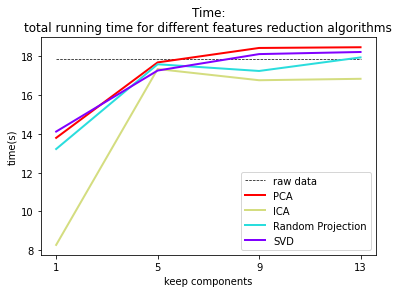

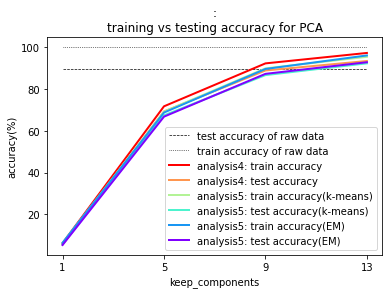

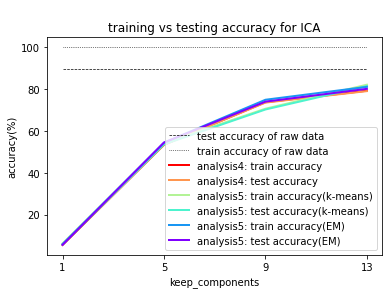

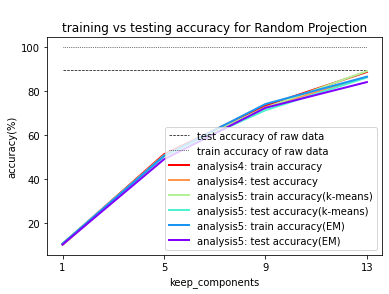

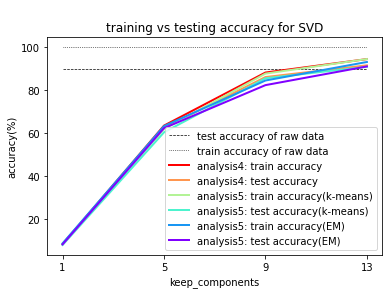

In [117]:
test4and5(X_train, y_train, X_test, y_test, 1, 16, 4)